# Data Collection

This is done in another notebook.

## Load Data


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = 'data'
import os
# check if path exists
if not os.path.exists(path):
    os.makedirs(path)
# load data-6hour-north-atlantic-2.nc
data_nc = xr.open_dataset(f'{path}/data-6hour-north-atlantic-2.nc')
# print(data_nc)
print(data_nc.dims)
print(data_nc.coords)
print(data_nc.data_vars)
# print the shape of the data_nc
print(data_nc.sst.shape)

Frozen(SortedKeysDict({'longitude': 41, 'latitude': 41, 'expver': 2, 'time': 10020}))
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -69.5 -69.25 -69.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2021-11-09T18:00:00
Data variables:
    sst      (time, expver, latitude, longitude) float32 ...
(10020, 2, 41, 41)


In [3]:
data_nc

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 41, longitude: 41, time: 10020)
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -69.5 -69.25 -69.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2021-11-09T18:00:00
Data variables:
    sst        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-13 22:15:22 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [ ]:
data_nc.time.values.shape

(10020,)

In [ ]:
data_nc.sst.values.shape

(10020, 2, 41, 41)

In [ ]:
# convert data_nc to numpy array
data_nc_np = data_nc.sst.values
print(data_nc_np.shape)
data_raw = data_nc_np[:, 0, :, :]
print(data_raw.shape)

(10020, 2, 41, 41)
(10020, 41, 41)


In [ ]:
data_nc.sst

<xarray.DataArray 'sst' (time: 10020, expver: 2, latitude: 41, longitude: 41)>
array([[[[      nan, ...,       nan],
         ...,
         [      nan, ..., 294.7917 ]],

        [[      nan, ...,       nan],
         ...,
         [      nan, ...,       nan]]],


       ...,


       [[[      nan, ...,       nan],
         ...,
         [287.72827, ..., 287.72827]],

        [[287.72827, ..., 287.72827],
         ...,
         [287.72827, ..., 287.72827]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -69.5 -69.25 -69.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 35.5 35.25 35.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2021-11-09T18:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [ ]:
# reshape data_raw to (data_raw.shape[0], data_raw.shape[1]*data_raw.shape[2])
data_raw = data_raw.reshape(data_raw.shape[0], data_raw.shape[1]*data_raw.shape[2])
print(data_raw.shape)

(10020, 1681)


In [ ]:
# save data_raw to data/data_raw.npy
np.save('data/data_raw.npy', data_raw)


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

from pandas import concat
import numpy as np
six_hour_sequence = {}
for i in range(0, data_raw.shape[1]):
    # get the sequence length of each variable
    sequence_length = data_raw.shape[0]
    # convert the data to a supervised learning problem
    data = series_to_supervised(data_raw[:, i].reshape(data_raw[:, i].shape[0], 1), n_in=10, n_out=5, dropnan=True)
    # add the variable to the dictionary
    six_hour_sequence[i] = data
    # print the shape of the data
    print(data.shape)


(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)


In [ ]:
# combine values of dictionary into one numpy array if the values are not empty
data_combined = np.empty((0, six_hour_sequence[0].shape[1]))
for i in range(0, data_raw.shape[1]):
    if six_hour_sequence[i].shape[0] != 0:
        data_combined = np.append(data_combined, six_hour_sequence[i], axis=0)
        print(data_combined.shape)


(4035, 15)
(8070, 15)
(12105, 15)
(16140, 15)
(20175, 15)
(24210, 15)
(28245, 15)
(32280, 15)
(36315, 15)
(40350, 15)
(44385, 15)
(48420, 15)
(52455, 15)
(56490, 15)
(60525, 15)
(64560, 15)
(68595, 15)
(72630, 15)
(76665, 15)
(80700, 15)
(84735, 15)
(88770, 15)
(92805, 15)
(96840, 15)
(100875, 15)
(104910, 15)
(108945, 15)
(112980, 15)
(117015, 15)
(121050, 15)
(125085, 15)
(129120, 15)
(133155, 15)
(137190, 15)
(141225, 15)
(145260, 15)
(149295, 15)
(153330, 15)
(157365, 15)
(161400, 15)
(165435, 15)
(169470, 15)
(173505, 15)
(177540, 15)
(181575, 15)
(185610, 15)
(189645, 15)
(193680, 15)
(197715, 15)
(201750, 15)
(205785, 15)
(209820, 15)
(213855, 15)
(217890, 15)
(221925, 15)
(225960, 15)
(229995, 15)
(234030, 15)
(238065, 15)
(242100, 15)
(246135, 15)
(250170, 15)
(254205, 15)
(258240, 15)
(262275, 15)
(266310, 15)
(270345, 15)
(274380, 15)
(278415, 15)
(282450, 15)
(286485, 15)
(290520, 15)
(294555, 15)
(298590, 15)
(302625, 15)
(306660, 15)
(310695, 15)
(314730, 15)
(318765, 15)

In [ ]:
print(data_combined.shape)
# print the first row of the data_combined
print(data_combined[0])

(3066828, 15)
[277.41766357 277.41766357 277.41766357 277.41766357 278.21456909
 278.21456909 278.21456909 278.21456909 278.43252563 278.43252563
 278.43252563 278.43252563 278.01248169 278.01248169 278.01248169]


In [ ]:
# save 100000 rows of data_combined to data/data_combined.npy
np.save('data/data_combined.npy', data_combined[:100000])

In [ ]:
# get the memory usage of data_combined
print(data_combined[:100000].nbytes)

12000000


# Run Time Series Clustering using DeTSEC 

## Data Collection and Transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
# load data_combined
data_combined = np.load('data/data_combined.npy')
# preprocess.normalize the data_combined
data_combined_normalized = preprocessing.normalize(data_combined)
# save the normalized data to data/data_normalized.npy
np.save('data/data_normalized.npy', data_combined_normalized)

file = "data/data_normalized.npy"
# np.save(file, data)
lis = [data_combined_normalized.shape[1]] * data_combined_normalized.shape[0]
seq_length = np.array(lis)
seq_file = "data/seq_length.npy"
np.save(seq_file, seq_length)

In [ ]:
# save the data_combined.npy, data_normalized.npy, seq_length.npy to google cloud storage
# gsutil cp data/data_combined.npy gs://sst-forecasting/data_combined.npy
# gsutil cp data/data_normalized.npy gs://sst-forecasting/data_normalized.npy
# gsutil cp data/seq_length.npy gs://sst-forecasting/seq_length.npy
import os
os.system('gsutil cp data/data_combined.npy gs://sst-forecasting/data_combined.npy')
os.system('gsutil cp data/data_normalized.npy gs://sst-forecasting/data_normalized.npy')
os.system('gsutil cp data/seq_length.npy gs://sst-forecasting/seq_length.npy')



256

In [ ]:
# print the location of the data_combined.npy, data_normalized.npy, seq_length.npy in google cloud storage
# gsutil ls gs://sst-forecasting
import os
os.system('gsutil ls gs://sst-forecasting')

256

### Load the data from google cloud storage

In [ ]:
# # load the data from google cloud storage
# # gsutil cp gs://sst-forecasting/data_combined.npy data/data_combined.npy
# # gsutil cp gs://sst-forecasting/data_normalized.npy data/data_normalized.npy
# # gsutil cp gs://sst-forecasting/seq_length.npy data/seq_length.npy
# import os
# os.system('gsutil cp gs://sst-forecasting/data_combined.npy data/data_combined.npy')
# os.system('gsutil cp gs://sst-forecasting/data_normalized.npy data/data_normalized.npy')
# os.system('gsutil cp gs://sst-forecasting/seq_length.npy data/seq_length.npy')


## Libraries

In [ ]:
import sys
import os
import numpy as np
import math
from operator import itemgetter, attrgetter, methodcaller
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
# from tensorflow.contrib.rnn import DropoutWrapper
import time
import calendar
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
# from tensorflow.contrib import rnn
from scipy.spatial import distance
from operator import itemgetter
import random as rand
from sklearn.cluster import KMeans
from tensorflow.compat.v1.nn.rnn_cell import DropoutWrapper
from tensorflow.compat.v1.nn import rnn_cell as rnn
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

## Functions required for clustering

In [ ]:
def buildMaskBatch(batch_seql, max_size):
    mask_batch = []
    for el in batch_seql:
        mask_batch.append(  np.concatenate( (np.ones(el), np.zeros(max_size - el)) ) )
    return np.array(mask_batch)

def extractFeatures(ts_data, seq_length, mask_val):
    batchsz = 1024
    iterations = int(ts_data.shape[0] / batchsz)
    if ts_data.shape[0] % batchsz != 0:
        iterations+=1
    features = None

    for ibatch in range(iterations):
        batch_data, batch_seqL = getBatch(ts_data, seq_length, ibatch, batchsz)
        batch_mask, _ = getBatch(mask_val, mask_val, ibatch, batchsz)
        partial_features = sess.run(embedding,feed_dict={input_t:batch_data, seqL:batch_seqL, mask: batch_mask})
        if features is None:
            features = partial_features
        else:
            features = np.vstack((features, partial_features))

        del batch_data
        del batch_mask
    return features

def gate(vec):
    mask = tf.compat.v1.layers.dense(vec, vec.get_shape()[1], activation=tf.sigmoid)
    return mask

def gating(outputs_list, mask):
    gating_results = None
    if mask is None:
        for i in range(len(outputs_list)):
            val = outputs_list[i]
            multiplication = val * gate(val)
            if gating_results is None:
                gating_results = multiplication
            else:
                gating_results = gating_results + multiplication
        return gating_results

    for i in range(len(outputs_list)):
        val = outputs_list[i]
        multiplication = val * gate(val)
        multiplication = tf.compat.v1.transpose( multiplication )
        multiplication = multiplication * mask[:,i]
        multiplication = tf.compat.v1.transpose( multiplication )
        if gating_results is None:
            gating_results = multiplication
        else:
            gating_results = gating_results +multiplication

    return gating_results

def attention(outputs_list, nunits, attention_size):
    outputs = tf.stack(outputs_list, axis=1)

    # Trainable parameters
    W_omega = tf.compat.v1.Variable(tf.compat.v1.random_normal([nunits, attention_size], stddev=0.1))
    b_omega = tf.compat.v1.Variable(tf.compat.v1.random_normal([attention_size], stddev=0.1))
    u_omega = tf.compat.v1.Variable(tf.compat.v1.random_normal([attention_size], stddev=0.1))

    # Applying fully connected layer with non-linear activation to each of the B*T timestamps;
    #  the shape of `v` is (B,T,D)*(D,A)=(B,T,A), where A=attention_size
    v = tf.compat.v1.tanh(tf.compat.v1.tensordot(outputs, W_omega, axes=1) + b_omega)
    # For each of the timestamps its vector of size A from `v` is reduced with `u` vector
    vu = tf.compat.v1.tensordot(v, u_omega, axes=1)   # (B,T) shape
    alphas = tf.compat.v1.nn.softmax(vu)              # (B,T) shape also

    output = tf.compat.v1.reduce_sum(outputs * tf.compat.v1.expand_dims(alphas, -1), 1)
    output = tf.compat.v1.reshape(output, [-1, nunits])
    return output

def getBatch(X, Y, i, batch_size):
    start_id = i*batch_size
    end_id = min( (i+1) * batch_size, X.shape[0])
    batch_x = X[start_id:end_id]
    batch_y = Y[start_id:end_id]
    return batch_x, batch_y


def AE3(x, b_size, n_dim, seqL, mask, toReuse):
    with tf.compat.v1.variable_scope("ENCDEC",reuse=toReuse):
        n_splits = x.get_shape()[1] / n_dim
        n_splits = int(n_splits)
        x_list = tf.compat.v1.split(x, n_splits, axis=1)
        x_list_bw = tf.compat.v1.stack(x_list[::-1],axis=1)
        x_list = tf.compat.v1.stack(x_list,axis=1)
        #FIXED TO 512 for big dataset
        #FOR SMALL DATASET WE RECOMMEND 64 OR 32
        nunits = 32
        outputsEncLFW = None
        outputsEncLBW = None

        with tf.compat.v1.variable_scope("encoderFWL", reuse=toReuse):
            cellEncoderFW = rnn.GRUCell(nunits)
            outputsEncLFW,_=tf.compat.v1.nn.dynamic_rnn(cellEncoderFW, x_list, sequence_length = seqL, dtype="float32")

        with tf.compat.v1.variable_scope("encoderBWL", reuse=toReuse):
            cellEncoderBW = rnn.GRUCell(nunits)
            outputsEncLBW,_=tf.compat.v1.nn.dynamic_rnn(cellEncoderBW, x_list_bw, sequence_length = seqL, dtype="float32")

        final_list_fw = []
        for i in range( n_splits ):
            final_list_fw.append( outputsEncLFW[:,i,:] )

        final_list_bw = []
        for i in range( n_splits ):
            final_list_bw.append( outputsEncLBW[:,i,:] )

        encoder_fw = attention(final_list_fw, nunits, nunits)
        encoder_bw = attention(final_list_bw, nunits, nunits)
        encoder = gate(encoder_fw) * encoder_fw + gate(encoder_bw) * encoder_bw

        x_list2decode = []
        x_list2decode_bw = []
        for i in range(n_splits):
            x_list2decode.append( tf.compat.v1.identity(encoder) )
            x_list2decode_bw.append( tf.compat.v1.identity(encoder) )

        x_list2decode = tf.compat.v1.stack(x_list2decode, axis=1)
        x_list2decode_bw = tf.compat.v1.stack(x_list2decode_bw, axis=1)

        with tf.compat.v1.variable_scope("decoderG", reuse=toReuse):
            cellDecoder = rnn.GRUCell(nunits)
            outputsDecG,_=tf.compat.v1.nn.dynamic_rnn(cellDecoder, x_list2decode, sequence_length = seqL, dtype="float32")

        with tf.compat.v1.variable_scope("decoderGFW", reuse=toReuse):
            cellDecoder = rnn.GRUCell(nunits)
            outputsDecGFW,_=tf.compat.v1.nn.dynamic_rnn(cellDecoder, x_list2decode_bw, sequence_length = seqL, dtype="float32")

        out_list = []
        out_list_bw = []
        for i in range(n_splits):
            temp_cell = outputsDecG[:,i,:]
            tt = tf.compat.v1.layers.dense(temp_cell, n_dim, activation=None)
            out_list.append( tt )

            temp_cell2 = outputsDecGFW[:,i,:]
            tt2 = tf.compat.v1.layers.dense(temp_cell, n_dim, activation=None)
            out_list_bw.append(tt2)

        reconstruct = tf.compat.v1.concat(out_list, axis=1)
        reconstruct2 = tf.compat.v1.concat(out_list_bw[::1], axis=1)

        return reconstruct, reconstruct2, encoder

## dirName, n_dims, n_clusters, output_dir, dataFileName, seqLFileName, data, n_row, n_col, seqLength, orig_data, orig_seqLength, n_feat


In [ ]:
dirName = "data"
n_dims = 1
n_clusters = 4

output_dir = 'output'
#DATA FILE with size:	(nSamples, (n_dims * max_length) )
dataFileName = dirName+"/data_normalized.npy"
#SEQUENCE LENGTH FILE with size: ( nSamples, )
#It contains the sequence length (multiplied by n_dims) for each sequence with positional reference to the data.npy file
#This means that, if a time series has 4 attributes and it has a lenght equal to 20, the corresponding values in the seq_length.npy file will be 80
seqLFileName = dirName+"/seq_length.npy"

data = np.load(dataFileName)
n_row = data.shape[0]
n_col = data.shape[1]

seqLength = np.load(seqLFileName)

orig_data = data
orig_seqLength = seqLength
n_feat = data.shape[1]


In [ ]:
data.shape

(100000, 15)

In [ ]:
seqLength.shape

(100000,)

## b_size, dropOut, seqL, input_t, mask, target_t, sess, 

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
b_size = tf.compat.v1.placeholder(tf.float32, () , name="b_size")
dropOut = tf.compat.v1.placeholder(tf.float32, () , name="dropOut")
seqL = tf.compat.v1.placeholder(tf.float32, (None) , name="seqL")
input_t = tf.compat.v1.placeholder(tf.float32, (None, n_feat), name='inputs')
mask = tf.compat.v1.placeholder(tf.float32, (None, n_feat), name='mask')
target_t = tf.compat.v1.placeholder(tf.float32, (None, n_feat), name='target_t')

sess = tf.compat.v1.InteractiveSession()

In [ ]:
input_t.get_shape()[1]

15

## reconstruction (forward), reconstruction2 (backward), embedding 

In [ ]:
reconstruction, reconstruction2, embedding = AE3(input_t, b_size, n_dims, seqL, mask, False)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_we

## b_centroids, loss_fw, loss_bw, cost, opt

In [ ]:
b_centroids = tf.compat.v1.placeholder(tf.float32, (None, embedding.get_shape()[1]), name='b_centroids')
loss_fw = tf.compat.v1.square( (target_t - reconstruction) * mask )
loss_fw = tf.compat.v1.reduce_sum(loss_fw, axis=1)

loss_bw = tf.compat.v1.square( (target_t - reconstruction2) * mask )
loss_bw = tf.compat.v1.reduce_sum(loss_bw, axis=1)

cost = tf.compat.v1.reduce_mean(loss_fw) + tf.compat.v1.reduce_mean(loss_bw)  #+ latent_loss
opt = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [ ]:
opt

<tf.Operation 'Adam' type=NoOp>

## CLUSTERING REFINEMENT CENTROIDS

###  loss_crc, cost_crc, opt_crc, batchsz, hm_epochs, iterations, max_length, best_loss, noise_factor, th, new_centroids, kmeans_labels

In [ ]:
loss_crc = tf.compat.v1.reduce_sum(tf.square( embedding - b_centroids ), axis=1)
loss_crc = tf.compat.v1.reduce_mean(loss_crc)

cost_crc = loss_crc + cost
opt_crc = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001).minimize(cost_crc)

tf.compat.v1.global_variables_initializer().run()

batchsz = 128
hm_epochs = 50

iterations = int(data.shape[0] / batchsz)
max_length = data.shape[1]

if data.shape[0] % batchsz != 0:
    iterations+=1

best_loss = sys.float_info.max
noise_factor = 0.01

th = 20 #number of epochs for the autoencoder pretraining step
new_centroids = None
kmeans_labels = None

loss_crc_list = []
cost_list = []

## Training


In [ ]:
for e in range(hm_epochs):
	start = time.time()
	lossi = 0
	data, seqLength = shuffle(data, seqLength, random_state=0)
	costT = 0
	costT2 = 0
	if e < th:
		data, seqLength = shuffle(data, seqLength, random_state=0)
	else:
		mask_val = buildMaskBatch(seqLength, max_length)
		features = extractFeatures(data, seqLength, mask_val)
		kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=random.randint(1,10000000)).fit(features)
		new_centroids = kmeans.cluster_centers_
		kmeans_labels = kmeans.labels_
		embeddings_data = extractFeatures(data, seqLength, mask_val)
		data, seqLength, kmeans_labels = shuffle(data, seqLength, kmeans_labels, random_state=0)

	for ibatch in range(iterations):
		batch_data, batch_seql = getBatch(data, seqLength, ibatch, batchsz)
		mask_batch = buildMaskBatch(batch_seql, batch_data.shape[1])
		cost_L = 0

		#PRETRAINING ENCODER for 50 EPOCHS
		if e < th:
			_, cost_L= sess.run([opt, cost],feed_dict={ input_t:batch_data,
														target_t:batch_data,
														b_size: batch_data.shape[0],
														seqL: batch_seql,
														mask: mask_batch
														})
			cost_C=0
		#COMBINED TRAINING WITH ENCO/DEC + CLUSTERING REFINEMENT
		else:
			batch_km_labels, _ = getBatch(kmeans_labels, kmeans_labels, ibatch, batchsz)
			batch_centroids = []
			for el in batch_km_labels:
				batch_centroids.append( new_centroids[el]  )
			batch_centroids = np.array(batch_centroids)
			_, cost_L, cost_C = sess.run([opt_crc, cost, loss_crc], feed_dict={
													input_t:batch_data,
													target_t:batch_data,
													#centroids: centroids_val,
													b_size: int(batch_data.shape[0]),
													seqL: batch_seql,
													mask: mask_batch,
													b_centroids: batch_centroids
													})

		costT+=cost_L
		costT2+=cost_C
		del batch_data
		del batch_seql
		del mask_batch

	mask_val = buildMaskBatch(seqLength, max_length)
	embedd = extractFeatures(data, seqLength, mask_val)
	kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedd)
	print("Epoch:",e,"| COST_EMB:",costT/iterations," | COST_CRC: ", costT2/iterations)
	cost_list.append(costT/iterations)
	loss_crc_list.append(costT2/iterations)


Epoch: 0 | COST_EMB: 0.34497941725846926  | COST_CRC:  0.0
Epoch: 1 | COST_EMB: 3.7008247211808636e-06  | COST_CRC:  0.0
Epoch: 2 | COST_EMB: 3.644031089595239e-06  | COST_CRC:  0.0
Epoch: 3 | COST_EMB: 3.647169700857573e-06  | COST_CRC:  0.0
Epoch: 4 | COST_EMB: 3.656803738066375e-06  | COST_CRC:  0.0
Epoch: 5 | COST_EMB: 3.668586214014962e-06  | COST_CRC:  0.0
Epoch: 6 | COST_EMB: 3.6826281763200186e-06  | COST_CRC:  0.0
Epoch: 7 | COST_EMB: 3.7245060883998653e-06  | COST_CRC:  0.0
Epoch: 8 | COST_EMB: 3.7672353985905768e-06  | COST_CRC:  0.0
Epoch: 9 | COST_EMB: 3.864065382089965e-06  | COST_CRC:  0.0
Epoch: 10 | COST_EMB: 3.966467367724975e-06  | COST_CRC:  0.0
Epoch: 11 | COST_EMB: 4.029871044268706e-06  | COST_CRC:  0.0
Epoch: 12 | COST_EMB: 4.061930043988473e-06  | COST_CRC:  0.0
Epoch: 13 | COST_EMB: 4.208770013441901e-06  | COST_CRC:  0.0
Epoch: 14 | COST_EMB: 4.15453954698172e-06  | COST_CRC:  0.0
Epoch: 15 | COST_EMB: 4.222920373093754e-06  | COST_CRC:  0.0
Epoch: 16 | COST_

## [Save model](https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/)

In [ ]:
saver = tf.compat.v1.train.Saver()
saver.save(sess, 'sst-cluster-model')

'sst-cluster-model'

## Plot Loss

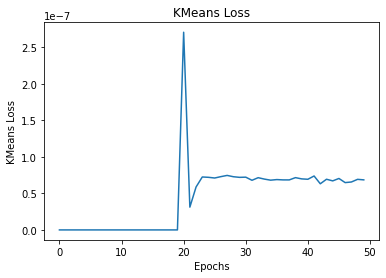

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_crc_list)
plt.title(f'KMeans Loss')
plt.ylabel('KMeans Loss')
plt.xlabel('Epochs')
plt.savefig(f"KMeans Loss.pdf", dpi = 150)
plt.show()

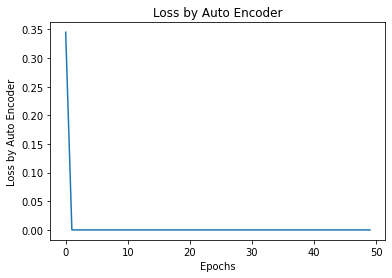

In [ ]:
plt.plot(cost_list)
plt.title(f'Loss by Auto Encoder')
plt.ylabel('Loss by Auto Encoder')
plt.xlabel('Epochs')
plt.savefig(f"Loss by Auto Encoder.pdf", dpi = 150)
plt.show()

## output_dir, mask_val, embedd, kmeans, data representation, clustering assignment

In [ ]:
output_dir = output_dir+"_detsec512"
if not os.path.exists(output_dir):
	os.mkdir(output_dir)

mask_val = buildMaskBatch(orig_seqLength, max_length)
embedd = extractFeatures(orig_data, orig_seqLength, mask_val)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedd)


In [ ]:
y = kmeans.labels_ 
y

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [ ]:
cluster_0 = data_combined[y==0, :]
cluster_1 = data_combined[y==1, :]
cluster_2 = data_combined[y==2, :]
cluster_3 = data_combined[y==3, :]

In [ ]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)

(49500, 15)
(8734, 15)
(12370, 15)
(29396, 15)


In [ ]:
np.save("cluster_0.npy", cluster_0)
np.save("cluster_1.npy", cluster_1)
np.save("cluster_2.npy", cluster_2)
np.save("cluster_3.npy", cluster_3)

In [ ]:
#SAVE THE DATA REPRESENTATION
np.save("detsec_features.npy", embedd )
#SAVE THE CLUSTERING ASSIGNMENT
np.save("detsec_clust_assignment.npy", np.array(kmeans.labels_) )

In [ ]:
embedd.shape

(100000, 32)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embedd)

In [ ]:
principalComponents.shape

(100000, 2)

In [ ]:
y_kmeans = kmeans.predict(embedd)

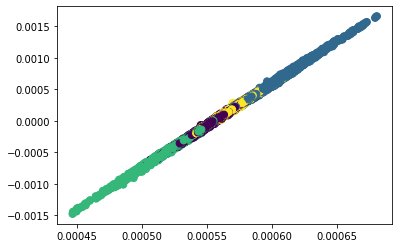

In [ ]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')
# save plot to file
plt.savefig(f"{output_dir}/detsec_clustering.pdf", dpi = 150)
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Latent ODE for SST Clusters

## Install this package

In [4]:
# Install the latest version of author's repo neural ode implementation
!git clone https://github.com/rtqichen/torchdiffeq.git
!cd torchdiffeq && pip install -e .
!pip install yfinance
!ls torchdiffeq/torchdiffeq

Cloning into 'torchdiffeq'...
remote: Enumerating objects: 1138, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 1138 (delta 256), reused 401 (delta 240), pack-reused 704
Receiving objects: 100% (1138/1138), 8.29 MiB | 31.92 MiB/s, done.
Resolving deltas: 100% (682/682), done.
Obtaining file:///content/torchdiffeq
  Running setup.py develop for torchdiffeq
     |████████████████████████████████| 6.3 MB 9.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
_impl  __init__.py


## Common Libraries

In [5]:
# run_models.py
import os
import sys
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot
import matplotlib.pyplot as plt

import time
import datetime
import argparse
import numpy as np
import pandas as pd
from random import SystemRandom
from sklearn import model_selection

import torch
import torch.nn as nn
from torch.nn.functional import relu
import torch.optim as optim

import utils as utils
# from data import *
# from lib.plotting import *

# from lib.rnn_baselines import *
# from lib.ode_rnn import *
# from lib.create_latent_ode_model import create_LatentODE_model
# from lib.parse_datasets import parse_datasets
# from lib.ode_func import ODEFunc, ODEFunc_w_Poisson
from diffeq_solver import DiffeqSolver
# from mujoco_physics import HopperPhysics

from utils import compute_loss_all_batches

import sys
# print(sys.argv[1:])

# Libraries for downloading data
from pandas_datareader import data as pdr
import yfinance as yf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Libraries for parsing data
from torch.distributions import uniform
from torch.utils.data import DataLoader
from sklearn import model_selection
import random
from utils import get_dict_template

# Libraries for encoder_decoder.py
from torch.distributions import Categorical, Normal
from torch.nn.modules.rnn import LSTM, GRU
from utils import get_device

# Libraries for likelihood_eval.py
import gc
import sklearn as sk
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
from torch.distributions import kl_divergence, Independent

# Libraries for base_models.py
from torch.nn.modules.rnn import GRUCell, LSTMCell, RNNCellBase
from torch.nn.parameter import Parameter

# Libraries for ode_func.py
from torch.nn.utils.spectral_norm import spectral_norm

## Parameters, Manual Seed, ExperimentID

In [9]:
# Generative model for noisy data based on ODE
parser = argparse.ArgumentParser('Latent ODE')
# n = size of the dataset
parser.add_argument('-n',  type=int, default=2000, help="Size of the dataset")
# n_iters = 50
parser.add_argument('--niters', type=int, default=10)
parser.add_argument('--lr',  type=float, default=1e-3, help="Starting learning rate.")
# batch_size = 50
parser.add_argument('-b', '--batch-size', type=int, default=10000)
parser.add_argument('--viz', action='store_true', help="Show plots while training")

parser.add_argument('--save', type=str, default='experiments/', help="Path for save checkpoints")
parser.add_argument('--load', type=str, default='35463', help="ID of the experiment to load for evaluation. If None, run a new experiment.")
parser.add_argument('-r', '--random-seed', type=int, default=1991, help="Random_seed")
# dataset = stock_lag5_forecast5
parser.add_argument('--dataset', type=str, default='stock_lag5_forecast5', help="Dataset to load. Available: stock_lag5_forecast5")
parser.add_argument('-s', '--sample-tp', type=float, default=None, help="Number of time points to sub-sample."
	"If > 1, subsample exact number of points. If the number is in [0,1], take a percentage of available points per time series. If None, do not subsample")

parser.add_argument('-c', '--cut-tp', type=int, default=None, help="Cut out the section of the timeline of the specified length (in number of points)."
	"Used for periodic function demo.")

parser.add_argument('--quantization', type=float, default=0.1, help="Quantization on the physionet dataset."
	"Value 1 means quantization by 1 hour, value 0.1 means quantization by 0.1 hour = 6 min")

parser.add_argument('--latent-ode', default = True, action='store_true', help="Run Latent ODE seq2seq model")
parser.add_argument('--z0-encoder', type=str, default='odernn', help="Type of encoder for Latent ODE model: odernn or rnn")

parser.add_argument('--classic-rnn', action='store_true', help="Run RNN baseline: classic RNN that sees true points at every point. Used for interpolation only.")
parser.add_argument('--rnn-cell', default="gru", help="RNN Cell type. Available: gru (default), expdecay")
parser.add_argument('--input-decay', action='store_true', help="For RNN: use the input that is the weighted average of impirical mean and previous value (like in GRU-D)")

parser.add_argument('--ode-rnn', action='store_true', help="Run ODE-RNN baseline: RNN-style that sees true points at every point. Used for interpolation only.")

parser.add_argument('--rnn-vae', action='store_true', help="Run RNN baseline: seq2seq model with sampling of the h0 and ELBO loss.")
# latents = input_dim
parser.add_argument('-l', '--latents', type=int, default=10, help="Size of the latent state")
# rec_dims = more than 2*input_dim
parser.add_argument('--rec-dims', type=int, default=25, help="Dimensionality of the recognition model (ODE or RNN).")

parser.add_argument('--rec-layers', type=int, default=3, help="Number of layers in ODE func in recognition ODE")
parser.add_argument('--gen-layers', type=int, default=3, help="Number of layers in ODE func in generative ODE")
# units for ODE func
parser.add_argument('-u', '--units', type=int, default=300, help="Number of units per layer in ODE func")
# units for GRU
parser.add_argument('-g', '--gru-units', type=int, default=100, help="Number of units per layer in each of GRU update networks")

parser.add_argument('--poisson', action='store_true', help="Model poisson-process likelihood for the density of events in addition to reconstruction.")
parser.add_argument('--classif', action='store_true', help="Include binary classification loss -- used for Physionet dataset for hospiral mortality")

parser.add_argument('--linear-classif', action='store_true', help="If using a classifier, use a linear classifier instead of 1-layer NN")
# extrap = True
parser.add_argument('--extrap', default = True, action='store_true', help="Set extrapolation mode. If this flag is not set, run interpolation mode.")
# timesteps = lag+forecast
parser.add_argument('-t', '--timepoints', type=int, default=15, help="Total number of time-points")
parser.add_argument('--max-t',  type=float, default=5., help="We subsample points in the interval [0, args.max_tp]")
parser.add_argument('--noise-weight', type=float, default=0.01, help="Noise amplitude for generated traejctories")

sys.argv = ['-f']
args = parser.parse_args()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# file_name = os.path.basename(__file__)[:-3]
utils.makedirs(args.save)  # saves in 'experiments/' folder



## args.latent_ode: encoder_decoder.py, likelihood_eval.py, base_models.py, ode_run.py, latent_ode.py, ode_func.py, create_latent_ode_model.py, 

In [10]:
# encoder_decoder.py
# GRU description: 
# http://www.wildml.com/2015/10/recurrent-neural-network-tutorial-part-4-implementing-a-grulstm-rnn-with-python-and-theano/
class GRU_unit(nn.Module):
	def __init__(self, latent_dim, input_dim, 
		update_gate = None,
		reset_gate = None,
		new_state_net = None,
		n_units = 100,
		device = torch.device("cpu")):
		super(GRU_unit, self).__init__()

		if update_gate is None:
			self.update_gate = nn.Sequential(
			   nn.Linear(latent_dim * 2 + input_dim, n_units),
			   nn.Tanh(),
			   nn.Linear(n_units, latent_dim),
			   nn.Sigmoid())
			utils.init_network_weights(self.update_gate)
		else: 
			self.update_gate  = update_gate

		if reset_gate is None:
			self.reset_gate = nn.Sequential(
			   nn.Linear(latent_dim * 2 + input_dim, n_units),
			   nn.Tanh(),
			   nn.Linear(n_units, latent_dim),
			   nn.Sigmoid())
			utils.init_network_weights(self.reset_gate)
		else: 
			self.reset_gate  = reset_gate

		if new_state_net is None:
			self.new_state_net = nn.Sequential(
			   nn.Linear(latent_dim * 2 + input_dim, n_units),
			   nn.Tanh(),
			   nn.Linear(n_units, latent_dim * 2))
			utils.init_network_weights(self.new_state_net)
		else: 
			self.new_state_net  = new_state_net


	def forward(self, y_mean, y_std, x, masked_update = True):
		y_concat = torch.cat([y_mean, y_std, x], -1)

		update_gate = self.update_gate(y_concat)
		reset_gate = self.reset_gate(y_concat)
		concat = torch.cat([y_mean * reset_gate, y_std * reset_gate, x], -1)
		
		new_state, new_state_std = utils.split_last_dim(self.new_state_net(concat))
		new_state_std = new_state_std.abs()

		new_y = (1-update_gate) * new_state + update_gate * y_mean
		new_y_std = (1-update_gate) * new_state_std + update_gate * y_std

		assert(not torch.isnan(new_y).any())

		if masked_update:
			# IMPORTANT: assumes that x contains both data and mask
			# update only the hidden states for hidden state only if at least one feature is present for the current time point
			n_data_dims = x.size(-1)//2
			mask = x[:, :, n_data_dims:]
			utils.check_mask(x[:, :, :n_data_dims], mask)
			
			mask = (torch.sum(mask, -1, keepdim = True) > 0).float()

			assert(not torch.isnan(mask).any())

			new_y = mask * new_y + (1-mask) * y_mean
			new_y_std = mask * new_y_std + (1-mask) * y_std

			if torch.isnan(new_y).any():
				print("new_y is nan!")
				print(mask)
				print(y_mean)
				print(prev_new_y)
				exit()

		new_y_std = new_y_std.abs()
		return new_y, new_y_std



class Encoder_z0_RNN(nn.Module):
	def __init__(self, latent_dim, input_dim, lstm_output_size = 20, 
		use_delta_t = True, device = torch.device("cpu")):
		
		super(Encoder_z0_RNN, self).__init__()
	
		self.gru_rnn_output_size = lstm_output_size
		self.latent_dim = latent_dim
		self.input_dim = input_dim
		self.device = device
		self.use_delta_t = use_delta_t

		self.hiddens_to_z0 = nn.Sequential(
		   nn.Linear(self.gru_rnn_output_size, 50),
		   nn.Tanh(),
		   nn.Linear(50, latent_dim * 2),)

		utils.init_network_weights(self.hiddens_to_z0)

		input_dim = self.input_dim

		if use_delta_t:
			self.input_dim += 1
		self.gru_rnn = GRU(self.input_dim, self.gru_rnn_output_size).to(device)

	def forward(self, data, time_steps, run_backwards = True):
		# IMPORTANT: assumes that 'data' already has mask concatenated to it 

		# data shape: [n_traj, n_tp, n_dims]
		# shape required for rnn: (seq_len, batch, input_size)
		# t0: not used here
		n_traj = data.size(0)

		assert(not torch.isnan(data).any())
		assert(not torch.isnan(time_steps).any())

		data = data.permute(1,0,2) 

		if run_backwards:
			# Look at data in the reverse order: from later points to the first
			data = utils.reverse(data)

		if self.use_delta_t:
			delta_t = time_steps[1:] - time_steps[:-1]
			if run_backwards:
				# we are going backwards in time with
				delta_t = utils.reverse(delta_t)
			# append zero delta t in the end
			delta_t = torch.cat((delta_t, torch.zeros(1).to(self.device)))
			delta_t = delta_t.unsqueeze(1).repeat((1,n_traj)).unsqueeze(-1)
			data = torch.cat((delta_t, data),-1)

		outputs, _ = self.gru_rnn(data)

		# LSTM output shape: (seq_len, batch, num_directions * hidden_size)
		last_output = outputs[-1]

		self.extra_info ={"rnn_outputs": outputs, "time_points": time_steps}

		mean, std = utils.split_last_dim(self.hiddens_to_z0(last_output))
		std = std.abs()

		assert(not torch.isnan(mean).any())
		assert(not torch.isnan(std).any())

		return mean.unsqueeze(0), std.unsqueeze(0)





class Encoder_z0_ODE_RNN(nn.Module):
	# Derive z0 by running ode backwards.
	# For every y_i we have two versions: encoded from data and derived from ODE by running it backwards from t_i+1 to t_i
	# Compute a weighted sum of y_i from data and y_i from ode. Use weighted y_i as an initial value for ODE runing from t_i to t_i-1
	# Continue until we get to z0
	def __init__(self, latent_dim, input_dim, z0_diffeq_solver = None, 
		z0_dim = None, GRU_update = None, 
		n_gru_units = 100, 
		device = torch.device("cpu")):
		
		super(Encoder_z0_ODE_RNN, self).__init__()

		if z0_dim is None:
			self.z0_dim = latent_dim
		else:
			self.z0_dim = z0_dim

		if GRU_update is None:
			self.GRU_update = GRU_unit(latent_dim, input_dim, 
				n_units = n_gru_units, 
				device=device).to(device)
		else:
			self.GRU_update = GRU_update

		self.z0_diffeq_solver = z0_diffeq_solver
		self.latent_dim = latent_dim
		self.input_dim = input_dim
		self.device = device
		self.extra_info = None

		self.transform_z0 = nn.Sequential(
		   nn.Linear(latent_dim * 2, 100),
		   nn.Tanh(),
		   nn.Linear(100, self.z0_dim * 2),)
		utils.init_network_weights(self.transform_z0)


	def forward(self, data, time_steps, run_backwards = False, save_info = False):
		# data, time_steps -- observations and their time stamps
		# IMPORTANT: assumes that 'data' already has mask concatenated to it 
		assert(not torch.isnan(data).any())
		assert(not torch.isnan(time_steps).any())

		n_traj, n_tp, n_dims = data.size()
		if len(time_steps) == 1:
			prev_y = torch.zeros((1, n_traj, self.latent_dim)).to(self.device)
			prev_std = torch.zeros((1, n_traj, self.latent_dim)).to(self.device)

			xi = data[:,0,:].unsqueeze(0)

			last_yi, last_yi_std = self.GRU_update(prev_y, prev_std, xi)
			extra_info = None
		else:
			
			last_yi, last_yi_std, _, extra_info = self.run_odernn(
				data, time_steps, run_backwards = run_backwards,
				save_info = save_info)

		means_z0 = last_yi.reshape(1, n_traj, self.latent_dim)
		std_z0 = last_yi_std.reshape(1, n_traj, self.latent_dim)

		mean_z0, std_z0 = utils.split_last_dim( self.transform_z0( torch.cat((means_z0, std_z0), -1)))
		std_z0 = std_z0.abs()
		if save_info:
			self.extra_info = extra_info

		return mean_z0, std_z0


	def run_odernn(self, data, time_steps, 
		run_backwards = True, save_info = False):
		# IMPORTANT: assumes that 'data' already has mask concatenated to it 

		n_traj, n_tp, n_dims = data.size()
		extra_info = []

		t0 = time_steps[-1]
		if run_backwards:
			t0 = time_steps[0]

		device = get_device(data)

		prev_y = torch.zeros((1, n_traj, self.latent_dim)).to(device)
		prev_std = torch.zeros((1, n_traj, self.latent_dim)).to(device)

		prev_t, t_i = time_steps[-1] + 0.01,  time_steps[-1]

		interval_length = time_steps[-1] - time_steps[0]
		minimum_step = interval_length / 50

		#print("minimum step: {}".format(minimum_step))

		assert(not torch.isnan(data).any())
		assert(not torch.isnan(time_steps).any())

		latent_ys = []
		# Run ODE backwards and combine the y(t) estimates using gating
		time_points_iter = range(0, len(time_steps))
		if run_backwards:
			time_points_iter = reversed(time_points_iter)

		for i in time_points_iter:
			if (prev_t - t_i) < minimum_step:
				time_points = torch.stack((prev_t, t_i))
				inc = self.z0_diffeq_solver.ode_func(prev_t, prev_y) * (t_i - prev_t)

				assert(not torch.isnan(inc).any())

				ode_sol = prev_y + inc
				ode_sol = torch.stack((prev_y, ode_sol), 2).to(device)

				assert(not torch.isnan(ode_sol).any())
			else:
				n_intermediate_tp = max(2, ((prev_t - t_i) / minimum_step).int())

				time_points = utils.linspace_vector(prev_t, t_i, n_intermediate_tp)
				ode_sol = self.z0_diffeq_solver(prev_y, time_points)

				assert(not torch.isnan(ode_sol).any())

			if torch.mean(ode_sol[:, :, 0, :]  - prev_y) >= 0.001:
				print("Error: first point of the ODE is not equal to initial value")
				print(torch.mean(ode_sol[:, :, 0, :]  - prev_y))
				exit()
			#assert(torch.mean(ode_sol[:, :, 0, :]  - prev_y) < 0.001)

			yi_ode = ode_sol[:, :, -1, :]
			xi = data[:,i,:].unsqueeze(0)
			
			yi, yi_std = self.GRU_update(yi_ode, prev_std, xi)

			prev_y, prev_std = yi, yi_std			
			prev_t, t_i = time_steps[i],  time_steps[i-1]

			latent_ys.append(yi)

			if save_info:
				d = {"yi_ode": yi_ode.detach(), #"yi_from_data": yi_from_data,
					 "yi": yi.detach(), "yi_std": yi_std.detach(), 
					 "time_points": time_points.detach(), "ode_sol": ode_sol.detach()}
				extra_info.append(d)

		latent_ys = torch.stack(latent_ys, 1)

		assert(not torch.isnan(yi).any())
		assert(not torch.isnan(yi_std).any())

		return yi, yi_std, latent_ys, extra_info



class Decoder(nn.Module):
	def __init__(self, latent_dim, input_dim):
		super(Decoder, self).__init__()
		# decode data from latent space where we are solving an ODE back to the data space

		decoder = nn.Sequential(
		   nn.Linear(latent_dim, input_dim),)

		utils.init_network_weights(decoder)	
		self.decoder = decoder

	def forward(self, data):
		return self.decoder(data)


# likelihood_eval.py
def gaussian_log_likelihood(mu_2d, data_2d, obsrv_std, indices = None):
	n_data_points = mu_2d.size()[-1]

	if n_data_points > 0:
		gaussian = Independent(Normal(loc = mu_2d, scale = obsrv_std.repeat(n_data_points)), 1)
		log_prob = gaussian.log_prob(data_2d) 
		log_prob = log_prob / n_data_points 
	else:
		log_prob = torch.zeros([1]).to(get_device(data_2d)).squeeze()
	return log_prob


def poisson_log_likelihood(masked_log_lambdas, masked_data, indices, int_lambdas):
	# masked_log_lambdas and masked_data 
	n_data_points = masked_data.size()[-1]

	if n_data_points > 0:
		log_prob = torch.sum(masked_log_lambdas) - int_lambdas[indices]
		#log_prob = log_prob / n_data_points
	else:
		log_prob = torch.zeros([1]).to(get_device(masked_data)).squeeze()
	return log_prob



def compute_binary_CE_loss(label_predictions, mortality_label):
	#print("Computing binary classification loss: compute_CE_loss")

	mortality_label = mortality_label.reshape(-1)

	if len(label_predictions.size()) == 1:
		label_predictions = label_predictions.unsqueeze(0)
 
	n_traj_samples = label_predictions.size(0)
	label_predictions = label_predictions.reshape(n_traj_samples, -1)
	
	idx_not_nan = ~torch.isnan(mortality_label)
	if len(idx_not_nan) == 0.:
		print("All are labels are NaNs!")
		ce_loss = torch.Tensor(0.).to(get_device(mortality_label))

	label_predictions = label_predictions[:,idx_not_nan]
	mortality_label = mortality_label[idx_not_nan]

	if torch.sum(mortality_label == 0.) == 0 or torch.sum(mortality_label == 1.) == 0:
		print("Warning: all examples in a batch belong to the same class -- please increase the batch size.")

	assert(not torch.isnan(label_predictions).any())
	assert(not torch.isnan(mortality_label).any())

	# For each trajectory, we get n_traj_samples samples from z0 -- compute loss on all of them
	mortality_label = mortality_label.repeat(n_traj_samples, 1)
	ce_loss = nn.BCEWithLogitsLoss()(label_predictions, mortality_label)

	# divide by number of patients in a batch
	ce_loss = ce_loss / n_traj_samples
	return ce_loss


def compute_multiclass_CE_loss(label_predictions, true_label, mask):
	#print("Computing multi-class classification loss: compute_multiclass_CE_loss")

	if (len(label_predictions.size()) == 3):
		label_predictions = label_predictions.unsqueeze(0)

	n_traj_samples, n_traj, n_tp, n_dims = label_predictions.size()

	# assert(not torch.isnan(label_predictions).any())
	# assert(not torch.isnan(true_label).any())

	# For each trajectory, we get n_traj_samples samples from z0 -- compute loss on all of them
	true_label = true_label.repeat(n_traj_samples, 1, 1)

	label_predictions = label_predictions.reshape(n_traj_samples * n_traj * n_tp, n_dims)
	true_label = true_label.reshape(n_traj_samples * n_traj * n_tp, n_dims)

	# choose time points with at least one measurement
	mask = torch.sum(mask, -1) > 0

	# repeat the mask for each label to mark that the label for this time point is present
	pred_mask = mask.repeat(n_dims, 1,1).permute(1,2,0)

	label_mask = mask
	pred_mask = pred_mask.repeat(n_traj_samples,1,1,1)
	label_mask = label_mask.repeat(n_traj_samples,1,1,1)

	pred_mask = pred_mask.reshape(n_traj_samples * n_traj * n_tp,  n_dims)
	label_mask = label_mask.reshape(n_traj_samples * n_traj * n_tp, 1)

	if (label_predictions.size(-1) > 1) and (true_label.size(-1) > 1):
		assert(label_predictions.size(-1) == true_label.size(-1))
		# targets are in one-hot encoding -- convert to indices
		_, true_label = true_label.max(-1)

	res = []
	for i in range(true_label.size(0)):
		pred_masked = torch.masked_select(label_predictions[i], pred_mask[i].bool())
		labels = torch.masked_select(true_label[i], label_mask[i].bool())
	
		pred_masked = pred_masked.reshape(-1, n_dims)

		if (len(labels) == 0):
			continue

		ce_loss = nn.CrossEntropyLoss()(pred_masked, labels.long())
		res.append(ce_loss)

	ce_loss = torch.stack(res, 0).to(get_device(label_predictions))
	ce_loss = torch.mean(ce_loss)
	# # divide by number of patients in a batch
	# ce_loss = ce_loss / n_traj_samples
	return ce_loss




def compute_masked_likelihood(mu, data, mask, likelihood_func):
	# Compute the likelihood per patient and per attribute so that we don't priorize patients with more measurements
	n_traj_samples, n_traj, n_timepoints, n_dims = data.size()

	res = []
	for i in range(n_traj_samples):
		for k in range(n_traj):
			for j in range(n_dims):
				data_masked = torch.masked_select(data[i,k,:,j], mask[i,k,:,j].bool())
				
				#assert(torch.sum(data_masked == 0.) < 10)

				mu_masked = torch.masked_select(mu[i,k,:,j], mask[i,k,:,j].bool())
				log_prob = likelihood_func(mu_masked, data_masked, indices = (i,k,j))
				res.append(log_prob)
	# shape: [n_traj*n_traj_samples, 1]

	res = torch.stack(res, 0).to(get_device(data))
	res = res.reshape((n_traj_samples, n_traj, n_dims))
	# Take mean over the number of dimensions
	res = torch.mean(res, -1) # !!!!!!!!!!! changed from sum to mean
	res = res.transpose(0,1)
	return res


def masked_gaussian_log_density(mu, data, obsrv_std, mask = None):
	# these cases are for plotting through plot_estim_density
	if (len(mu.size()) == 3):
		# add additional dimension for gp samples
		mu = mu.unsqueeze(0)

	if (len(data.size()) == 2):
		# add additional dimension for gp samples and time step
		data = data.unsqueeze(0).unsqueeze(2)
	elif (len(data.size()) == 3):
		# add additional dimension for gp samples
		data = data.unsqueeze(0)

	n_traj_samples, n_traj, n_timepoints, n_dims = mu.size()

	assert(data.size()[-1] == n_dims)

	# Shape after permutation: [n_traj, n_traj_samples, n_timepoints, n_dims]
	if mask is None:
		mu_flat = mu.reshape(n_traj_samples*n_traj, n_timepoints * n_dims)
		n_traj_samples, n_traj, n_timepoints, n_dims = data.size()
		data_flat = data.reshape(n_traj_samples*n_traj, n_timepoints * n_dims)
	
		res = gaussian_log_likelihood(mu_flat, data_flat, obsrv_std)
		res = res.reshape(n_traj_samples, n_traj).transpose(0,1)
	else:
		# Compute the likelihood per patient so that we don't priorize patients with more measurements
		func = lambda mu, data, indices: gaussian_log_likelihood(mu, data, obsrv_std = obsrv_std, indices = indices)
		res = compute_masked_likelihood(mu, data, mask, func)
	return res



def mse(mu, data, indices = None):
	n_data_points = mu.size()[-1]

	if n_data_points > 0:
		mse = nn.MSELoss()(mu, data)
	else:
		mse = torch.zeros([1]).to(get_device(data)).squeeze()
	return mse


def compute_mse(mu, data, mask = None):
	# these cases are for plotting through plot_estim_density
	if (len(mu.size()) == 3):
		# add additional dimension for gp samples
		mu = mu.unsqueeze(0)

	if (len(data.size()) == 2):
		# add additional dimension for gp samples and time step
		data = data.unsqueeze(0).unsqueeze(2)
	elif (len(data.size()) == 3):
		# add additional dimension for gp samples
		data = data.unsqueeze(0)

	n_traj_samples, n_traj, n_timepoints, n_dims = mu.size()
	assert(data.size()[-1] == n_dims)

	# Shape after permutation: [n_traj, n_traj_samples, n_timepoints, n_dims]
	if mask is None:
		mu_flat = mu.reshape(n_traj_samples*n_traj, n_timepoints * n_dims)
		n_traj_samples, n_traj, n_timepoints, n_dims = data.size()
		data_flat = data.reshape(n_traj_samples*n_traj, n_timepoints * n_dims)
		res = mse(mu_flat, data_flat)
	else:
		# Compute the likelihood per patient so that we don't priorize patients with more measurements
		res = compute_masked_likelihood(mu, data, mask, mse)
	return res




def compute_poisson_proc_likelihood(truth, pred_y, info, mask = None):
	# Compute Poisson likelihood
	# https://math.stackexchange.com/questions/344487/log-likelihood-of-a-realization-of-a-poisson-process
	# Sum log lambdas across all time points
	if mask is None:
		poisson_log_l = torch.sum(info["log_lambda_y"], 2) - info["int_lambda"]
		# Sum over data dims
		poisson_log_l = torch.mean(poisson_log_l, -1)
	else:
		# Compute likelihood of the data under the predictions
		truth_repeated = truth.repeat(pred_y.size(0), 1, 1, 1)
		mask_repeated = mask.repeat(pred_y.size(0), 1, 1, 1)

		# Compute the likelihood per patient and per attribute so that we don't priorize patients with more measurements
		int_lambda = info["int_lambda"]
		f = lambda log_lam, data, indices: poisson_log_likelihood(log_lam, data, indices, int_lambda)
		poisson_log_l = compute_masked_likelihood(info["log_lambda_y"], truth_repeated, mask_repeated, f)
		poisson_log_l = poisson_log_l.permute(1,0)
		# Take mean over n_traj
		#poisson_log_l = torch.mean(poisson_log_l, 1)
		
	# poisson_log_l shape: [n_traj_samples, n_traj]
	return poisson_log_l

# base_models.py

def create_classifier(z0_dim, n_labels):
	return nn.Sequential(
			nn.Linear(z0_dim, 300),
			nn.ReLU(),
			nn.Linear(300, 300),
			nn.ReLU(),
			nn.Linear(300, n_labels),)


class Baseline(nn.Module):
	def __init__(self, input_dim, latent_dim, device, 
		obsrv_std = 0.01, use_binary_classif = False,
		classif_per_tp = False,
		use_poisson_proc = False,
		linear_classifier = False,
		n_labels = 1,
		train_classif_w_reconstr = False):
		super(Baseline, self).__init__()

		self.input_dim = input_dim
		self.latent_dim = latent_dim
		self.n_labels = n_labels

		self.obsrv_std = torch.Tensor([obsrv_std]).to(device)
		self.device = device

		self.use_binary_classif = use_binary_classif
		self.classif_per_tp = classif_per_tp
		self.use_poisson_proc = use_poisson_proc
		self.linear_classifier = linear_classifier
		self.train_classif_w_reconstr = train_classif_w_reconstr

		z0_dim = latent_dim
		if use_poisson_proc:
			z0_dim += latent_dim

		if use_binary_classif: 
			if linear_classifier:
				self.classifier = nn.Sequential(
					nn.Linear(z0_dim, n_labels))
			else:
				self.classifier = create_classifier(z0_dim, n_labels)
			utils.init_network_weights(self.classifier)


	def get_gaussian_likelihood(self, truth, pred_y, mask = None):
		# pred_y shape [n_traj_samples, n_traj, n_tp, n_dim]
		# truth shape  [n_traj, n_tp, n_dim]
		if mask is not None:
			mask = mask.repeat(pred_y.size(0), 1, 1, 1)

		# Compute likelihood of the data under the predictions
		log_density_data = masked_gaussian_log_density(pred_y, truth, 
			obsrv_std = self.obsrv_std, mask = mask)
		log_density_data = log_density_data.permute(1,0)

		# Compute the total density
		# Take mean over n_traj_samples
		log_density = torch.mean(log_density_data, 0)

		# shape: [n_traj]
		return log_density


	def get_mse(self, truth, pred_y, mask = None):
		# pred_y shape [n_traj_samples, n_traj, n_tp, n_dim]
		# truth shape  [n_traj, n_tp, n_dim]
		if mask is not None:
			mask = mask.repeat(pred_y.size(0), 1, 1, 1)

		# Compute likelihood of the data under the predictions
		log_density_data = compute_mse(pred_y, truth, mask = mask)
		# shape: [1]
		return torch.mean(log_density_data)


	def compute_all_losses(self, batch_dict,
		n_tp_to_sample = None, n_traj_samples = 1, kl_coef = 1.):

		# Condition on subsampled points
		# Make predictions for all the points
		pred_x, info = self.get_reconstruction(batch_dict["tp_to_predict"], 
			batch_dict["observed_data"], batch_dict["observed_tp"], 
			mask = batch_dict["observed_mask"], n_traj_samples = n_traj_samples,
			mode = batch_dict["mode"])

		# Compute likelihood of all the points
		likelihood = self.get_gaussian_likelihood(batch_dict["data_to_predict"], pred_x,
			mask = batch_dict["mask_predicted_data"])

		mse = self.get_mse(batch_dict["data_to_predict"], pred_x,
			mask = batch_dict["mask_predicted_data"])

		################################
		# Compute CE loss for binary classification on Physionet
		# Use only last attribute -- mortatility in the hospital 
		device = get_device(batch_dict["data_to_predict"])
		ce_loss = torch.Tensor([0.]).to(device)
		
		if (batch_dict["labels"] is not None) and self.use_binary_classif:
			if (batch_dict["labels"].size(-1) == 1) or (len(batch_dict["labels"].size()) == 1):
				ce_loss = compute_binary_CE_loss(
					info["label_predictions"], 
					batch_dict["labels"])
			else:
				ce_loss = compute_multiclass_CE_loss(
					info["label_predictions"], 
					batch_dict["labels"],
					mask = batch_dict["mask_predicted_data"])

			if torch.isnan(ce_loss):
				print("label pred")
				print(info["label_predictions"])
				print("labels")
				print( batch_dict["labels"])
				raise Exception("CE loss is Nan!")

		pois_log_likelihood = torch.Tensor([0.]).to(get_device(batch_dict["data_to_predict"]))
		if self.use_poisson_proc:
			pois_log_likelihood = compute_poisson_proc_likelihood(
				batch_dict["data_to_predict"], pred_x, 
				info, mask = batch_dict["mask_predicted_data"])
			# Take mean over n_traj
			pois_log_likelihood = torch.mean(pois_log_likelihood, 1)

		loss = - torch.mean(likelihood)

		if self.use_poisson_proc:
			loss = loss - 0.1 * pois_log_likelihood 

		if self.use_binary_classif:
			if self.train_classif_w_reconstr:
				loss = loss +  ce_loss * 100
			else:
				loss =  ce_loss

		# Take mean over the number of samples in a batch
		results = {}
		results["loss"] = torch.mean(loss)
		results["likelihood"] = torch.mean(likelihood).detach()
		results["mse"] = torch.mean(mse).detach()
		results["pois_likelihood"] = torch.mean(pois_log_likelihood).detach()
		results["ce_loss"] = torch.mean(ce_loss).detach()
		results["kl"] = 0.
		results["kl_first_p"] =  0.
		results["std_first_p"] = 0.

		if batch_dict["labels"] is not None and self.use_binary_classif:
			results["label_predictions"] = info["label_predictions"].detach()
		return results



class VAE_Baseline(nn.Module):
	def __init__(self, input_dim, latent_dim, 
		z0_prior, device,
		obsrv_std = 0.01, 
		use_binary_classif = False,
		classif_per_tp = False,
		use_poisson_proc = False,
		linear_classifier = False,
		n_labels = 1,
		train_classif_w_reconstr = False):

		super(VAE_Baseline, self).__init__()
		
		self.input_dim = input_dim
		self.latent_dim = latent_dim
		self.device = device
		self.n_labels = n_labels

		self.obsrv_std = torch.Tensor([obsrv_std]).to(device)

		self.z0_prior = z0_prior
		self.use_binary_classif = use_binary_classif
		self.classif_per_tp = classif_per_tp
		self.use_poisson_proc = use_poisson_proc
		self.linear_classifier = linear_classifier
		self.train_classif_w_reconstr = train_classif_w_reconstr

		z0_dim = latent_dim
		if use_poisson_proc:
			z0_dim += latent_dim

		if use_binary_classif: 
			if linear_classifier:
				self.classifier = nn.Sequential(
					nn.Linear(z0_dim, n_labels))
			else:
				self.classifier = create_classifier(z0_dim, n_labels)
			utils.init_network_weights(self.classifier)


	def get_gaussian_likelihood(self, truth, pred_y, mask = None):
		# pred_y shape [n_traj_samples, n_traj, n_tp, n_dim]
		# truth shape  [n_traj, n_tp, n_dim]
		n_traj, n_tp, n_dim = truth.size()

		# Compute likelihood of the data under the predictions
		truth_repeated = truth.repeat(pred_y.size(0), 1, 1, 1)
		
		if mask is not None:
			mask = mask.repeat(pred_y.size(0), 1, 1, 1)
		log_density_data = masked_gaussian_log_density(pred_y, truth_repeated, 
			obsrv_std = self.obsrv_std, mask = mask)
		log_density_data = log_density_data.permute(1,0)
		log_density = torch.mean(log_density_data, 1)

		# shape: [n_traj_samples]
		return log_density


	def get_mse(self, truth, pred_y, mask = None):
		# pred_y shape [n_traj_samples, n_traj, n_tp, n_dim]
		# truth shape  [n_traj, n_tp, n_dim]
		n_traj, n_tp, n_dim = truth.size()

		# Compute likelihood of the data under the predictions
		truth_repeated = truth.repeat(pred_y.size(0), 1, 1, 1)
		
		if mask is not None:
			mask = mask.repeat(pred_y.size(0), 1, 1, 1)

		# Compute likelihood of the data under the predictions
		log_density_data = compute_mse(pred_y, truth_repeated, mask = mask)
		# shape: [1]
		return torch.mean(log_density_data)


	def compute_all_losses(self, batch_dict, n_traj_samples = 1, kl_coef = 1.):
		# Condition on subsampled points
		# Make predictions for all the points
		pred_y, info = self.get_reconstruction(batch_dict["tp_to_predict"], 
			batch_dict["observed_data"], batch_dict["observed_tp"], 
			mask = batch_dict["observed_mask"], n_traj_samples = n_traj_samples,
			mode = batch_dict["mode"])

		#print("get_reconstruction done -- computing likelihood")
		fp_mu, fp_std, fp_enc = info["first_point"]
		fp_std = fp_std.abs()
		fp_distr = Normal(fp_mu, fp_std)

		# assert(torch.sum(fp_std < 0) == 0.)

		kldiv_z0 = kl_divergence(fp_distr, self.z0_prior)

		if torch.isnan(kldiv_z0).any():
			print(fp_mu)
			print(fp_std)
			raise Exception("kldiv_z0 is Nan!")

		# Mean over number of latent dimensions
		# kldiv_z0 shape: [n_traj_samples, n_traj, n_latent_dims] if prior is a mixture of gaussians (KL is estimated)
		# kldiv_z0 shape: [1, n_traj, n_latent_dims] if prior is a standard gaussian (KL is computed exactly)
		# shape after: [n_traj_samples]
		kldiv_z0 = torch.mean(kldiv_z0,(1,2))

		# Compute likelihood of all the points
		rec_likelihood = self.get_gaussian_likelihood(
			batch_dict["data_to_predict"], pred_y,
			mask = batch_dict["mask_predicted_data"])

		mse = self.get_mse(
			batch_dict["data_to_predict"], pred_y,
			mask = batch_dict["mask_predicted_data"])

		pois_log_likelihood = torch.Tensor([0.]).to(get_device(batch_dict["data_to_predict"]))
		if self.use_poisson_proc:
			pois_log_likelihood = compute_poisson_proc_likelihood(
				batch_dict["data_to_predict"], pred_y, 
				info, mask = batch_dict["mask_predicted_data"])
			# Take mean over n_traj
			pois_log_likelihood = torch.mean(pois_log_likelihood, 1)

		################################
		# Compute CE loss for binary classification on Physionet
		device = get_device(batch_dict["data_to_predict"])
		ce_loss = torch.Tensor([0.]).to(device)
		if (batch_dict["labels"] is not None) and self.use_binary_classif:

			if (batch_dict["labels"].size(-1) == 1) or (len(batch_dict["labels"].size()) == 1):
				ce_loss = compute_binary_CE_loss(
					info["label_predictions"], 
					batch_dict["labels"])
			else:
				ce_loss = compute_multiclass_CE_loss(
					info["label_predictions"], 
					batch_dict["labels"],
					mask = batch_dict["mask_predicted_data"])

		# IWAE loss
		loss = - torch.logsumexp(rec_likelihood -  kl_coef * kldiv_z0,0)
		if torch.isnan(loss):
			loss = - torch.mean(rec_likelihood - kl_coef * kldiv_z0,0)
			
		if self.use_poisson_proc:
			loss = loss - 0.1 * pois_log_likelihood 

		if self.use_binary_classif:
			if self.train_classif_w_reconstr:
				loss = loss +  ce_loss * 100
			else:
				loss =  ce_loss

		results = {}
		results['pred_y'] = pred_y
		results['true_y'] = batch_dict["data_to_predict"]
		results["loss"] = torch.mean(loss)
		results["likelihood"] = torch.mean(rec_likelihood).detach()
		results["mse"] = torch.mean(mse).detach()
		results["pois_likelihood"] = torch.mean(pois_log_likelihood).detach()
		results["ce_loss"] = torch.mean(ce_loss).detach()
		results["kl_first_p"] =  torch.mean(kldiv_z0).detach()
		results["std_first_p"] = torch.mean(fp_std).detach()

		if batch_dict["labels"] is not None and self.use_binary_classif:
			results["label_predictions"] = info["label_predictions"].detach()

		return results


# ode_run.py
class ODE_RNN(Baseline):
	def __init__(self, input_dim, latent_dim, device = torch.device("cpu"),
		z0_diffeq_solver = None, n_gru_units = 100,  n_units = 100,
		concat_mask = False, obsrv_std = 0.1, use_binary_classif = False,
		classif_per_tp = False, n_labels = 1, train_classif_w_reconstr = False):

		Baseline.__init__(self, input_dim, latent_dim, device = device, 
			obsrv_std = obsrv_std, use_binary_classif = use_binary_classif,
			classif_per_tp = classif_per_tp,
			n_labels = n_labels,
			train_classif_w_reconstr = train_classif_w_reconstr)

		ode_rnn_encoder_dim = latent_dim
	
		self.ode_gru = Encoder_z0_ODE_RNN( 
			latent_dim = ode_rnn_encoder_dim, 
			input_dim = (input_dim) * 2, # input and the mask
			z0_diffeq_solver = z0_diffeq_solver, 
			n_gru_units = n_gru_units, 
			device = device).to(device)

		self.z0_diffeq_solver = z0_diffeq_solver

		self.decoder = nn.Sequential(
			nn.Linear(latent_dim, n_units),
			nn.Tanh(),
			nn.Linear(n_units, input_dim),)

		utils.init_network_weights(self.decoder)


	def get_reconstruction(self, time_steps_to_predict, data, truth_time_steps, 
		mask = None, n_traj_samples = None, mode = None):

		if (len(truth_time_steps) != len(time_steps_to_predict)) or (torch.sum(time_steps_to_predict - truth_time_steps) != 0):
			raise Exception("Extrapolation mode not implemented for ODE-RNN")

		# time_steps_to_predict and truth_time_steps should be the same 
		assert(len(truth_time_steps) == len(time_steps_to_predict))
		assert(mask is not None)
		
		data_and_mask = data
		if mask is not None:
			data_and_mask = torch.cat([data, mask],-1)

		_, _, latent_ys, _ = self.ode_gru.run_odernn(
			data_and_mask, truth_time_steps, run_backwards = False)
		
		latent_ys = latent_ys.permute(0,2,1,3)
		last_hidden = latent_ys[:,:,-1,:]

			#assert(torch.sum(int_lambda[0,0,-1,:] <= 0) == 0.)

		outputs = self.decoder(latent_ys)
		# Shift outputs for computing the loss -- we should compare the first output to the second data point, etc.
		first_point = data[:,0,:]
		outputs = utils.shift_outputs(outputs, first_point)

		extra_info = {"first_point": (latent_ys[:,:,-1,:], 0.0, latent_ys[:,:,-1,:])}

		if self.use_binary_classif:
			if self.classif_per_tp:
				extra_info["label_predictions"] = self.classifier(latent_ys)
			else:
				extra_info["label_predictions"] = self.classifier(last_hidden).squeeze(-1)

		# outputs shape: [n_traj_samples, n_traj, n_tp, n_dims]
		return outputs, extra_info

# latent_ode.py
class LatentODE(VAE_Baseline):
	def __init__(self, input_dim, latent_dim, encoder_z0, decoder, diffeq_solver, 
		z0_prior, device, obsrv_std = None, 
		use_binary_classif = False, use_poisson_proc = False,
		linear_classifier = False,
		classif_per_tp = False,
		n_labels = 1,
		train_classif_w_reconstr = False):

		super(LatentODE, self).__init__(
			input_dim = input_dim, latent_dim = latent_dim, 
			z0_prior = z0_prior, 
			device = device, obsrv_std = obsrv_std, 
			use_binary_classif = use_binary_classif,
			classif_per_tp = classif_per_tp, 
			linear_classifier = linear_classifier,
			use_poisson_proc = use_poisson_proc,
			n_labels = n_labels,
			train_classif_w_reconstr = train_classif_w_reconstr)

		self.encoder_z0 = encoder_z0
		self.diffeq_solver = diffeq_solver
		self.decoder = decoder
		self.use_poisson_proc = use_poisson_proc

	def get_reconstruction(self, time_steps_to_predict, truth, truth_time_steps, 
		mask = None, n_traj_samples = 1, run_backwards = True, mode = None):

		if isinstance(self.encoder_z0, Encoder_z0_ODE_RNN) or \
			isinstance(self.encoder_z0, Encoder_z0_RNN):

			truth_w_mask = truth
			if mask is not None:
				truth_w_mask = torch.cat((truth, mask), -1)
			first_point_mu, first_point_std = self.encoder_z0(
				truth_w_mask, truth_time_steps, run_backwards = run_backwards)

			means_z0 = first_point_mu.repeat(n_traj_samples, 1, 1)
			sigma_z0 = first_point_std.repeat(n_traj_samples, 1, 1)
			first_point_enc = utils.sample_standard_gaussian(means_z0, sigma_z0)

		else:
			raise Exception("Unknown encoder type {}".format(type(self.encoder_z0).__name__))
		
		first_point_std = first_point_std.abs()
		assert(torch.sum(first_point_std < 0) == 0.)

		if self.use_poisson_proc:
			n_traj_samples, n_traj, n_dims = first_point_enc.size()
			# append a vector of zeros to compute the integral of lambda
			zeros = torch.zeros([n_traj_samples, n_traj,self.input_dim]).to(get_device(truth))
			first_point_enc_aug = torch.cat((first_point_enc, zeros), -1)
			means_z0_aug = torch.cat((means_z0, zeros), -1)
		else:
			first_point_enc_aug = first_point_enc
			means_z0_aug = means_z0
			
		assert(not torch.isnan(time_steps_to_predict).any())
		assert(not torch.isnan(first_point_enc).any())
		assert(not torch.isnan(first_point_enc_aug).any())

		# Shape of sol_y [n_traj_samples, n_samples, n_timepoints, n_latents]
		sol_y = self.diffeq_solver(first_point_enc_aug, time_steps_to_predict)

		if self.use_poisson_proc:
			sol_y, log_lambda_y, int_lambda, _ = self.diffeq_solver.ode_func.extract_poisson_rate(sol_y)

			assert(torch.sum(int_lambda[:,:,0,:]) == 0.)
			assert(torch.sum(int_lambda[0,0,-1,:] <= 0) == 0.)

		pred_x = self.decoder(sol_y)

		all_extra_info = {
			"first_point": (first_point_mu, first_point_std, first_point_enc),
			"latent_traj": sol_y.detach()
		}

		if self.use_poisson_proc:
			# intergral of lambda from the last step of ODE Solver
			all_extra_info["int_lambda"] = int_lambda[:,:,-1,:]
			all_extra_info["log_lambda_y"] = log_lambda_y

		if self.use_binary_classif:
			if self.classif_per_tp:
				all_extra_info["label_predictions"] = self.classifier(sol_y)
			else:
				all_extra_info["label_predictions"] = self.classifier(first_point_enc).squeeze(-1)

		return pred_x, all_extra_info


	def sample_traj_from_prior(self, time_steps_to_predict, n_traj_samples = 1):
		# input_dim = starting_point.size()[-1]
		# starting_point = starting_point.view(1,1,input_dim)

		# Sample z0 from prior
		starting_point_enc = self.z0_prior.sample([n_traj_samples, 1, self.latent_dim]).squeeze(-1)

		starting_point_enc_aug = starting_point_enc
		if self.use_poisson_proc:
			n_traj_samples, n_traj, n_dims = starting_point_enc.size()
			# append a vector of zeros to compute the integral of lambda
			zeros = torch.zeros(n_traj_samples, n_traj,self.input_dim).to(self.device)
			starting_point_enc_aug = torch.cat((starting_point_enc, zeros), -1)

		sol_y = self.diffeq_solver.sample_traj_from_prior(starting_point_enc_aug, time_steps_to_predict, 
			n_traj_samples = 3)

		if self.use_poisson_proc:
			sol_y, log_lambda_y, int_lambda, _ = self.diffeq_solver.ode_func.extract_poisson_rate(sol_y)
		
		return self.decoder(sol_y)

# ode_func.py
class ODEFunc(nn.Module):
	def __init__(self, input_dim, latent_dim, ode_func_net, device = torch.device("cpu")):
		"""
		input_dim: dimensionality of the input
		latent_dim: dimensionality used for ODE. Analog of a continous latent state
		"""
		# print(f"Inside ODEFunc class")
		super(ODEFunc, self).__init__()

		self.input_dim = input_dim
		# print(f"input_dim is {input_dim}")
		# print(f"latent_dim is {latent_dim}")
		self.device = device

		utils.init_network_weights(ode_func_net)
		self.gradient_net = ode_func_net

	def forward(self, t_local, y, backwards = False):
		"""
		Perform one step in solving ODE. Given current data point y and current time point t_local, returns gradient dy/dt at this time point

		t_local: current time point
		y: value at the current time point
		"""
		grad = self.get_ode_gradient_nn(t_local, y)
		if backwards:
			grad = -grad
		return grad

	def get_ode_gradient_nn(self, t_local, y):
		return self.gradient_net(y)

	def sample_next_point_from_prior(self, t_local, y):
		"""
		t_local: current time point
		y: value at the current time point
		"""
		return self.get_ode_gradient_nn(t_local, y)

#####################################################################################################

class ODEFunc_w_Poisson(ODEFunc):
	
	def __init__(self, input_dim, latent_dim, ode_func_net,
		lambda_net, device = torch.device("cpu")):
		"""
		input_dim: dimensionality of the input
		latent_dim: dimensionality used for ODE. Analog of a continous latent state
		"""
		super(ODEFunc_w_Poisson, self).__init__(input_dim, latent_dim, ode_func_net, device)

		self.latent_ode = ODEFunc(input_dim = input_dim, 
			latent_dim = latent_dim, 
			ode_func_net = ode_func_net,
			device = device)

		self.latent_dim = latent_dim
		self.lambda_net = lambda_net
		# The computation of poisson likelihood can become numerically unstable. 
		#The integral lambda(t) dt can take large values. In fact, it is equal to the expected number of events on the interval [0,T]
		#Exponent of lambda can also take large values
		# So we divide lambda by the constant and then multiply the integral of lambda by the constant
		self.const_for_lambda = torch.Tensor([100.]).to(device)

	def extract_poisson_rate(self, augmented, final_result = True):
		y, log_lambdas, int_lambda = None, None, None

		assert(augmented.size(-1) == self.latent_dim + self.input_dim)		
		latent_lam_dim = self.latent_dim // 2

		if len(augmented.size()) == 3:
			int_lambda  = augmented[:,:,-self.input_dim:] 
			y_latent_lam = augmented[:,:,:-self.input_dim]

			log_lambdas  = self.lambda_net(y_latent_lam[:,:,-latent_lam_dim:])
			y = y_latent_lam[:,:,:-latent_lam_dim]

		elif len(augmented.size()) == 4:
			int_lambda  = augmented[:,:,:,-self.input_dim:]
			y_latent_lam = augmented[:,:,:,:-self.input_dim]

			log_lambdas  = self.lambda_net(y_latent_lam[:,:,:,-latent_lam_dim:])
			y = y_latent_lam[:,:,:,:-latent_lam_dim]

		# Multiply the intergral over lambda by a constant 
		# only when we have finished the integral computation (i.e. this is not a call in get_ode_gradient_nn)
		if final_result:
			int_lambda = int_lambda * self.const_for_lambda
			
		# Latents for performing reconstruction (y) have the same size as latent poisson rate (log_lambdas)
		assert(y.size(-1) == latent_lam_dim)

		return y, log_lambdas, int_lambda, y_latent_lam


	def get_ode_gradient_nn(self, t_local, augmented):
		y, log_lam, int_lambda, y_latent_lam = self.extract_poisson_rate(augmented, final_result = False)
		dydt_dldt = self.latent_ode(t_local, y_latent_lam)

		log_lam = log_lam - torch.log(self.const_for_lambda)
		return torch.cat((dydt_dldt, torch.exp(log_lam)),-1)

# create_latent_ode_model.py
def create_LatentODE_model(args, input_dim, z0_prior, obsrv_std, device, 
	classif_per_tp = False, n_labels = 1):

	dim = args.latents
	if args.poisson:
		lambda_net = utils.create_net(dim, input_dim, 
			n_layers = 1, n_units = args.units, nonlinear = nn.Tanh)

		# ODE function produces the gradient for latent state and for poisson rate
		ode_func_net = utils.create_net(dim * 2, args.latents * 2, 
			n_layers = args.gen_layers, n_units = args.units, nonlinear = nn.Tanh)

		gen_ode_func = ODEFunc_w_Poisson(
			input_dim = input_dim, 
			latent_dim = args.latents * 2,
			ode_func_net = ode_func_net,
			lambda_net = lambda_net,
			device = device).to(device)
	else:
		dim = args.latents 
		ode_func_net = utils.create_net(dim, args.latents, 
			n_layers = args.gen_layers, n_units = args.units, nonlinear = nn.Tanh)

		gen_ode_func = ODEFunc(
			input_dim = input_dim, 
			latent_dim = args.latents, 
			ode_func_net = ode_func_net,
			device = device).to(device)

	z0_diffeq_solver = None
	n_rec_dims = args.rec_dims
	enc_input_dim = int(input_dim) * 2 # we concatenate the mask
	gen_data_dim = input_dim

	z0_dim = args.latents
	if args.poisson:
		z0_dim += args.latents # predict the initial poisson rate

	if args.z0_encoder == "odernn":
		ode_func_net = utils.create_net(n_rec_dims, n_rec_dims, 
			n_layers = args.rec_layers, n_units = args.units, nonlinear = nn.Tanh)

		rec_ode_func = ODEFunc(
			input_dim = enc_input_dim, 
			latent_dim = n_rec_dims,
			ode_func_net = ode_func_net,
			device = device).to(device)

		z0_diffeq_solver = DiffeqSolver(enc_input_dim, rec_ode_func, "euler", args.latents, 
			odeint_rtol = 1e-3, odeint_atol = 1e-4, device = device)
		
		encoder_z0 = Encoder_z0_ODE_RNN(n_rec_dims, enc_input_dim, z0_diffeq_solver, 
			z0_dim = z0_dim, n_gru_units = args.gru_units, device = device).to(device)

	elif args.z0_encoder == "rnn":
		encoder_z0 = Encoder_z0_RNN(z0_dim, enc_input_dim,
			lstm_output_size = n_rec_dims, device = device).to(device)
	else:
		raise Exception("Unknown encoder for Latent ODE model: " + args.z0_encoder)

	decoder = Decoder(args.latents, gen_data_dim).to(device)

	diffeq_solver = DiffeqSolver(gen_data_dim, gen_ode_func, 'dopri5', args.latents, 
		odeint_rtol = 1e-3, odeint_atol = 1e-4, device = device)

	model = LatentODE(
		input_dim = gen_data_dim, 
		latent_dim = args.latents, 
		encoder_z0 = encoder_z0, 
		decoder = decoder, 
		diffeq_solver = diffeq_solver, 
		z0_prior = z0_prior, 
		device = device,
		obsrv_std = obsrv_std,
		use_poisson_proc = args.poisson, 
		use_binary_classif = args.classif,
		linear_classifier = args.linear_classif,
		classif_per_tp = classif_per_tp,
		n_labels = n_labels,
		train_classif_w_reconstr = (args.dataset == "physionet")
		).to(device)

	return model

## Cluster 0

In [11]:
torch.manual_seed(args.random_seed)
np.random.seed(args.random_seed)

experimentID = args.load  # None
# print(f"experimentID is {experimentID}")

if experimentID is None:
    # Make a new experiment ID
    experimentID = int(SystemRandom().random()*100000) # from random import SystemRandom
print(f"experimentID is {experimentID}")
ckpt_path = os.path.join(args.save, "experiment_" + str(experimentID) + '.ckpt') 
# print(f"ckpt_path is {ckpt_path}")

start = time.time()
# print("Sampling dataset of {} training examples".format(args.n))  # n is size of the dataset

# print(f"args is {str(args)}")

input_command = sys.argv
# print(f"input_command is {input_command}")

ind = [i for i in range(len(input_command)) if input_command[i] == "--load"]
# print(f"ind is {ind}")
# print(f"len(ind) is {len(ind)}")

if len(ind) == 1:
    ind = ind[0]
    input_command = input_command[:ind] + input_command[(ind+2):]
input_command = " ".join(input_command)
# print(f"input_command is {input_command}")
utils.makedirs("results/")


experimentID is 35463


### Get Dataset

In [12]:
# Importing the data with index as the first column
training_path = 'data'
cluster = 0
lag = 10
forecast = 5
data = np.load(f"{training_path}/cluster_{cluster}.npy")
data_df = pd.DataFrame(data)
data_df.to_csv(f"{training_path}/cluster_{cluster}.csv")
print(f"data.shape {data.shape}")
# Reshape data to (data.shape[0], lag+forecast, data.shape[1])
data = data.reshape(data.shape[0], lag+forecast, 1)
# print(f"data.shape {data.shape}")

# Convert data to tensor
data = torch.from_numpy(data).float().to(device)
print(f"data.shape {data.shape}")

data.shape (49500, 15)
data.shape torch.Size([49500, 15, 1])


### Parse Dataset

In [19]:
###########################
# Latent ODEs for Stock Data 
# Authors: Omkar Mehta 
###########################

class StockData(object):

	def __init__(self, root, download = True, generate=False, device = torch.device("cpu")):
		self.root = root
		if download:
			data = self._download()

		if generate:
			self._generate_dataset()

		if not self._check_exists():
			raise RuntimeError('Dataset not found.' + ' You can use download=True to download it')

		data_file = os.path.join(self.data_folder, training_file)
		data = pd.read_csv(os.path.join(self.root, training_file), index_col=0).values
		# Reshape data to (data.shape[0], lag+forecast, data.shape[1])
		data = data.reshape(data.shape[0], lag+forecast, D)
		# Convert data to tensor
		self.data = torch.from_numpy(data).float().to(device)
		self.data, self.data_min, self.data_max = utils.normalize_data(self.data)

		self.device =device

	def _download(self):
		if self._check_exists():
			return
		if not os.path.exists(self.data_folder):
			os.makedirs(self.data_folder, exist_ok=True)
		data = pd.read_csv(os.path.join(self.root, training_file), index_col=0).values
		# Reshape data to (data.shape[0], lag+forecast, data.shape[1])
		data = data.reshape(data.shape[0], lag+forecast, 1)
		return data
	def _check_exists(self):
		return os.path.exists(os.path.join(self.data_folder, training_file))

	@property
	def data_folder(self):
		return os.path.join(self.root)

	# def __getitem__(self, index):
	#     return self.data[index]

	def get_dataset(self):
		return self.data

	def __len__(self):
		return len(self.data)

	def size(self, ind = None):
		if ind is not None:
			return self.data.shape[ind]
		return self.data.shape
			
	def __repr__(self):
		fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
		fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
		fmt_str += '    Root Location: {}\n'.format(self.root)
		return fmt_str


In [20]:
def parse_datasets(args, device):
    	
	# Parse datasets
	def basic_collate_fn(batch, time_steps, args = args, device = device, data_type = "train"):
		batch = torch.stack(batch)
		data_dict = {
			"data": batch, 
			"time_steps": time_steps}

		data_dict = utils.split_and_subsample_batch(data_dict, args, data_type = data_type)
		return data_dict


	dataset_name = args.dataset

	n_total_tp = args.timepoints + args.extrap
	max_t_extrap = args.max_t / args.timepoints * n_total_tp

	##################################################################
	# Stock Data with lag and forecast dataset
	if dataset_name == "stock_lag5_forecast5":
		dataset_obj = StockData(root='data', download=True, generate=False, device = device)
		dataset = dataset_obj.get_dataset()
		dataset = dataset.to(device)


		n_tp_data = dataset[:].shape[1]

		# Time steps that are used later on for exrapolation
		time_steps = torch.arange(start=0, end = n_tp_data, step=1).float().to(device)
		time_steps = time_steps / len(time_steps)

		dataset = dataset.to(device)
		time_steps = time_steps.to(device)

		if not args.extrap:
			# Creating dataset for interpolation
			# sample time points from different parts of the timeline, 
			# so that the model learns from different parts of hopper trajectory
			n_traj = len(dataset)
			n_tp_data = dataset.shape[1]
			n_reduced_tp = args.timepoints

			# sample time points from different parts of the timeline, 
			# so that the model learns from different parts of hopper trajectory
			start_ind = np.random.randint(0, high=n_tp_data - n_reduced_tp +1, size=n_traj)
			end_ind = start_ind + n_reduced_tp
			sliced = []
			for i in range(n_traj):
				  sliced.append(dataset[i, start_ind[i] : end_ind[i], :])
			dataset = torch.stack(sliced).to(device)
			time_steps = time_steps[:n_reduced_tp]

		# Split into train and test by the time sequences
		train_y, test_y = utils.split_train_test(dataset, train_fraq = 0.8)

		n_samples = len(dataset)
		input_dim = dataset.size(-1)

		batch_size = min(args.batch_size, args.n)
		train_dataloader = DataLoader(train_y, batch_size = batch_size, shuffle=False,
			collate_fn= lambda batch: basic_collate_fn(batch, time_steps, data_type = "train"))
		test_dataloader = DataLoader(test_y, batch_size = n_samples, shuffle=False,
			collate_fn= lambda batch: basic_collate_fn(batch, time_steps, data_type = "test"))
		
		data_objects = {"dataset_obj": dataset_obj, 
					"train_dataloader": utils.inf_generator(train_dataloader), 
					"test_dataloader": utils.inf_generator(test_dataloader),
					"input_dim": input_dim,
					"n_train_batches": len(train_dataloader),
					"n_test_batches": len(test_dataloader)}
		return data_objects

	##################################################################
	# Physionet dataset

	if dataset_name == "physionet":
		train_dataset_obj = PhysioNet('data/physionet', train=True, 
										quantization = args.quantization,
										download=True, n_samples = min(10000, args.n), 
										device = device)
		# Use custom collate_fn to combine samples with arbitrary time observations.
		# Returns the dataset along with mask and time steps
		test_dataset_obj = PhysioNet('data/physionet', train=False, 
										quantization = args.quantization,
										download=True, n_samples = min(10000, args.n), 
										device = device)

		# Combine and shuffle samples from physionet Train and physionet Test
		total_dataset = train_dataset_obj[:len(train_dataset_obj)]

		if not args.classif:
			# Concatenate samples from original Train and Test sets
			# Only 'training' physionet samples are have labels. Therefore, if we do classifiction task, we don't need physionet 'test' samples.
			total_dataset = total_dataset + test_dataset_obj[:len(test_dataset_obj)]

		# Shuffle and split
		train_data, test_data = model_selection.train_test_split(total_dataset, train_size= 0.8, 
			random_state = 42, shuffle = True)

		record_id, tt, vals, mask, labels = train_data[0]

		n_samples = len(total_dataset)
		input_dim = vals.size(-1)

		batch_size = min(min(len(train_dataset_obj), args.batch_size), args.n)
		data_min, data_max = get_data_min_max(total_dataset)

		train_dataloader = DataLoader(train_data, batch_size= batch_size, shuffle=False, 
			collate_fn= lambda batch: variable_time_collate_fn(batch, args, device, data_type = "train",
				data_min = data_min, data_max = data_max))
		test_dataloader = DataLoader(test_data, batch_size = n_samples, shuffle=False, 
			collate_fn= lambda batch: variable_time_collate_fn(batch, args, device, data_type = "test",
				data_min = data_min, data_max = data_max))

		attr_names = train_dataset_obj.params
		data_objects = {"dataset_obj": train_dataset_obj, 
					"train_dataloader": utils.inf_generator(train_dataloader), 
					"test_dataloader": utils.inf_generator(test_dataloader),
					"input_dim": input_dim,
					"n_train_batches": len(train_dataloader),
					"n_test_batches": len(test_dataloader),
					"attr": attr_names, #optional
					"classif_per_tp": False, #optional
					"n_labels": 1} #optional
		return data_objects

	##################################################################
	# Human activity dataset

	if dataset_name == "activity":
		n_samples =  min(10000, args.n)
		dataset_obj = PersonActivity('data/PersonActivity', 
							download=True, n_samples =  n_samples, device = device)
		print(dataset_obj)
		# Use custom collate_fn to combine samples with arbitrary time observations.
		# Returns the dataset along with mask and time steps

		# Shuffle and split
		train_data, test_data = model_selection.train_test_split(dataset_obj, train_size= 0.8, 
			random_state = 42, shuffle = True)

		train_data = [train_data[i] for i in np.random.choice(len(train_data), len(train_data))]
		test_data = [test_data[i] for i in np.random.choice(len(test_data), len(test_data))]

		record_id, tt, vals, mask, labels = train_data[0]
		input_dim = vals.size(-1)

		batch_size = min(min(len(dataset_obj), args.batch_size), args.n)
		train_dataloader = DataLoader(train_data, batch_size= batch_size, shuffle=False, 
			collate_fn= lambda batch: variable_time_collate_fn_activity(batch, args, device, data_type = "train"))
		test_dataloader = DataLoader(test_data, batch_size=n_samples, shuffle=False, 
			collate_fn= lambda batch: variable_time_collate_fn_activity(batch, args, device, data_type = "test"))

		data_objects = {"dataset_obj": dataset_obj, 
					"train_dataloader": utils.inf_generator(train_dataloader), 
					"test_dataloader": utils.inf_generator(test_dataloader),
					"input_dim": input_dim,
					"n_train_batches": len(train_dataloader),
					"n_test_batches": len(test_dataloader),
					"classif_per_tp": True, #optional
					"n_labels": labels.size(-1)}

		return data_objects

	########### 1d datasets ###########

	# Sampling args.timepoints time points in the interval [0, args.max_t]
	# Sample points for both training sequence and explapolation (test)
	distribution = uniform.Uniform(torch.Tensor([0.0]),torch.Tensor([max_t_extrap]))
	time_steps_extrap =  distribution.sample(torch.Size([n_total_tp-1]))[:,0]
	time_steps_extrap = torch.cat((torch.Tensor([0.0]), time_steps_extrap))
	time_steps_extrap = torch.sort(time_steps_extrap)[0]

	dataset_obj = None
	##################################################################
	# Sample a periodic function
	if dataset_name == "periodic":
		dataset_obj = Periodic_1d(
			init_freq = None, init_amplitude = 1.,
			final_amplitude = 1., final_freq = None, 
			z0 = 1.)

	##################################################################

	if dataset_obj is None:
		raise Exception("Unknown dataset: {}".format(dataset_name))

	dataset = dataset_obj.sample_traj(time_steps_extrap, n_samples = args.n, 
		noise_weight = args.noise_weight)

	# Process small datasets
	dataset = dataset.to(device)
	time_steps_extrap = time_steps_extrap.to(device)

	train_y, test_y = utils.split_train_test(dataset, train_fraq = 0.8)

	n_samples = len(dataset)
	input_dim = dataset.size(-1)

	batch_size = min(args.batch_size, args.n)
	train_dataloader = DataLoader(train_y, batch_size = batch_size, shuffle=False,
		collate_fn= lambda batch: basic_collate_fn(batch, time_steps_extrap, data_type = "train"))
	test_dataloader = DataLoader(test_y, batch_size = args.n, shuffle=False,
		collate_fn= lambda batch: basic_collate_fn(batch, time_steps_extrap, data_type = "test"))
	
	data_objects = {#"dataset_obj": dataset_obj, 
				"train_dataloader": utils.inf_generator(train_dataloader), 
				"test_dataloader": utils.inf_generator(test_dataloader),
				"input_dim": input_dim,
				"n_train_batches": len(train_dataloader),
				"n_test_batches": len(test_dataloader)}

	return data_objects


In [21]:
lag = 10
forecast = 5

T = lag+forecast
print(f"T is {T}")
D = 1
print(f"D is {D}")
root = 'data'
n_training_samples = data.shape[0]
training_file = f'cluster_{cluster}.csv'

data_obj = parse_datasets(args, device)
input_dim = data_obj["input_dim"]
print(f"input_dim is {input_dim}")

classif_per_tp = False
if ("classif_per_tp" in data_obj):
    # do classification per time point rather than on a time series as a whole
    classif_per_tp = data_obj["classif_per_tp"]

if args.classif and (args.dataset == "hopper" or args.dataset == "periodic"):
    raise Exception("Classification task is not available for MuJoCo and 1d datasets")


T is 15
D is 1
input_dim is 1


### n_labels, obsrv_std, z0_prior

In [ ]:
n_labels = 1
if args.classif:
    if ("n_labels" in data_obj):
        n_labels = data_obj["n_labels"]
    else:
        raise Exception("Please provide number of labels for classification task")

##################################################################
# Create the model
obsrv_std = 0.01
if args.dataset == "stock_lag5_forecast5":
    obsrv_std = 1e-3 

obsrv_std = torch.Tensor([obsrv_std]).to(device)

z0_prior = Normal(torch.Tensor([0.0]).to(device), torch.Tensor([1.]).to(device))

### Create latent ODE model

In [ ]:
if args.latent_ode:
    model = create_LatentODE_model(args, input_dim, z0_prior, obsrv_std, device, 
        classif_per_tp = classif_per_tp,
        n_labels = n_labels)
else:
	raise Exception("Model not specified")

### Training

In [ ]:
train_lr_list = []
kl_coef_list = []
train_pred_y_list = []
train_true_y_list = []
train_loss_list = [] # ELBO
train_likelihood_list = [] # Rec Likelihood
train_mse_list = []
train_kl_first_p_list = [] # KL Divergence between z0
train_std_first_p_list = []


test_pred_y_list = []
test_true_y_list = []
test_loss_list = [] # ELBO
test_likelihood_list = [] # Rec Likelihood
test_mse_list = []
test_kl_first_p_list = [] # KL Divergence between z0
test_std_first_p_list = []

In [ ]:
#Load checkpoint and evaluate the model
if args.load is not None:
	utils.get_ckpt_model(ckpt_path, model, device)
	# exit()
else:
	file_name = os.path.abspath('')
	log_path = "logs/" + file_name + "_" + str(experimentID) + ".log"
	if not os.path.exists("logs/"):
		utils.makedirs("logs/")
	logger = utils.get_logger(logpath=log_path, filepath=os.path.abspath(''))
	logger.info(input_command)

	optimizer = optim.Adamax(model.parameters(), lr=args.lr)
	# print(f"optimizer is {optimizer}")
	num_batches = data_obj["n_train_batches"]
	print(f"num_batches is {num_batches}")

	for itr in range(1, num_batches * (args.niters + 1)):
		optimizer.zero_grad()
		utils.update_learning_rate(optimizer, decay_rate = 0.999, lowest = args.lr / 10)

		wait_until_kl_inc = 10
		if itr // num_batches < wait_until_kl_inc:
			kl_coef = 0.
		else:
			kl_coef = (1-0.99** (itr // num_batches - wait_until_kl_inc))
		kl_coef_list.append(kl_coef)
		batch_dict = utils.get_next_batch(data_obj["train_dataloader"])
		train_res = model.compute_all_losses(batch_dict, n_traj_samples = 1, kl_coef = kl_coef)
		
		train_loss_list.append(train_res['loss'].cpu().item())
		train_likelihood_list.append(train_res['likelihood'].cpu().item())
		train_mse_list.append(train_res['mse'].cpu().item())
		train_kl_first_p_list.append(train_res['kl_first_p'].cpu().item())
		train_std_first_p_list.append(train_res['std_first_p'].cpu().item())
		train_res["loss"].backward()
		optimizer.step()

		n_iters_to_viz = 1
		if itr % (n_iters_to_viz * num_batches) == 0:
			with torch.no_grad():

				test_res = compute_loss_all_batches(model, 
					data_obj["test_dataloader"], args,
					n_batches = data_obj["n_test_batches"],
					experimentID = experimentID,
					device = device,
					n_traj_samples = 1, kl_coef = kl_coef)
				
				test_loss_list.append(test_res['loss'].cpu().item())
				test_likelihood_list.append(test_res['likelihood'].cpu().item())
				test_mse_list.append(test_res['mse'].cpu().item())
				test_kl_first_p_list.append(test_res['kl_first_p'].cpu().item())
				test_std_first_p_list.append(test_res['std_first_p'].cpu().item())

				message = 'Epoch {:04d} [Test seq (cond on sampled tp)] | Loss {:.6f} | Likelihood {:.6f} | KL fp {:.4f} | FP STD {:.4f}|'.format(
					itr//num_batches, 
					test_res["loss"].detach(), test_res["likelihood"].detach(), 
					test_res["kl_first_p"], test_res["std_first_p"])
			
				logger.info("Experiment " + str(experimentID))
				logger.info(message)
				logger.info("KL coef: {}".format(kl_coef))
				logger.info("Train loss (one batch): {}".format(train_res["loss"].detach()))
				logger.info("Train CE loss (one batch): {}".format(train_res["ce_loss"].detach()))
				
				if "auc" in test_res:
					logger.info("Classification AUC (TEST): {:.4f}".format(test_res["auc"]))

				if "mse" in test_res:
					logger.info("Test MSE: {}".format(test_res["mse"]))

				if "accuracy" in train_res:
					logger.info("Classification accuracy (TRAIN): {:.4f}".format(train_res["accuracy"]))

				if "accuracy" in test_res:
					logger.info("Classification accuracy (TEST): {:.4f}".format(test_res["accuracy"]))

				if "pois_likelihood" in test_res:
					logger.info("Poisson likelihood: {}".format(test_res["pois_likelihood"]))

				if "ce_loss" in test_res:
					logger.info("CE loss: {}".format(test_res["ce_loss"]))

			torch.save({
				'args': args,
				'state_dict': model.state_dict(),
			}, ckpt_path)


			# Plotting
			if args.viz:
				with torch.no_grad():
					test_dict = utils.get_next_batch(data_obj["test_dataloader"])

					print("plotting....")
					if isinstance(model, LatentODE) and (args.dataset == "periodic"): #and not args.classic_rnn and not args.ode_rnn:
						plot_id = itr // num_batches // n_iters_to_viz
						viz.draw_all_plots_one_dim(test_dict, model, 
							plot_name = file_name + "_" + str(experimentID) + "_{:03d}".format(plot_id) + ".png",
							experimentID = experimentID, save=True)
						plt.pause(0.01)
	# train_pred_y_list.append(train_res['pred_y'].cpu().numpy())
	# train_true_y_list.append(train_res['true_y'].cpu().numpy())
	# test_pred_y_list.append(test_res['pred_y'].cpu().numpy())
	# test_true_y_list.append(test_res['true_y'].cpu().numpy())
	torch.save({
		'args': args,
		'state_dict': model.state_dict(),
	}, ckpt_path)



/content
/content
/content
-f
-f
-f
/content/torchdiffeq/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


num_batches is 20


Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0001 [Test seq (cond on sampled tp)] | Loss 145.915939 | Likelihood -145.915939 | KL fp 4.8820 | FP STD 0.0078|
Epoch 0001 [Test seq (cond on sampled tp)] | Loss 145.915939 | Likelihood -145.915939 | KL fp 4.8820 | FP STD 0.0078|
Epoch 0001 [Test seq (cond on sampled tp)] | Loss 145.915939 | Likelihood -145.915939 | KL fp 4.8820 | FP STD 0.0078|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): 150.98255920410156
Train loss (one batch): 150.98255920410156
Train loss (one batch): 150.98255920410156
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 0.00030380950192920864
Test MSE: 0.00030380950192920864
Test MSE: 0.00030380950192920864
Poisson likelihood: 0.0
Poisson likelihood: 0.0


Computing loss... 0


Poisson likelihood: 0.0
CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0002 [Test seq (cond on sampled tp)] | Loss 108.578842 | Likelihood -108.578842 | KL fp 5.2139 | FP STD 0.0047|
Epoch 0002 [Test seq (cond on sampled tp)] | Loss 108.578842 | Likelihood -108.578842 | KL fp 5.2139 | FP STD 0.0047|
Epoch 0002 [Test seq (cond on sampled tp)] | Loss 108.578842 | Likelihood -108.578842 | KL fp 5.2139 | FP STD 0.0047|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): 101.33509826660156
Train loss (one batch): 101.33509826660156
Train loss (one batch): 101.33509826660156
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 0.00022913534485269338


Computing loss... 0


Test MSE: 0.00022913534485269338
Test MSE: 0.00022913534485269338
Poisson likelihood: 0.0
Poisson likelihood: 0.0
Poisson likelihood: 0.0
CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0003 [Test seq (cond on sampled tp)] | Loss 30.909946 | Likelihood -30.909946 | KL fp 5.0748 | FP STD 0.0068|
Epoch 0003 [Test seq (cond on sampled tp)] | Loss 30.909946 | Likelihood -30.909946 | KL fp 5.0748 | FP STD 0.0068|
Epoch 0003 [Test seq (cond on sampled tp)] | Loss 30.909946 | Likelihood -30.909946 | KL fp 5.0748 | FP STD 0.0068|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): 72.70620727539062
Train loss (one batch): 72.70620727539062
Train loss (one batch): 72.70620727539062
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 7.379753515124321e-05
Test MSE: 7.379753515124321e-05
Test MSE: 7.379753515124321e-05
Poisson likelihood: 0.0
Poisson likelihood: 0.0
Poisson likelihood: 0.

Computing loss... 0


CE loss: 0.0
CE loss: 0.0
CE loss: 0.0


Computing loss... 0


Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0004 [Test seq (cond on sampled tp)] | Loss 0.396974 | Likelihood -0.396974 | KL fp 5.4815 | FP STD 0.0058|
Epoch 0004 [Test seq (cond on sampled tp)] | Loss 0.396974 | Likelihood -0.396974 | KL fp 5.4815 | FP STD 0.0058|
Epoch 0004 [Test seq (cond on sampled tp)] | Loss 0.396974 | Likelihood -0.396974 | KL fp 5.4815 | FP STD 0.0058|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): 3.619379758834839
Train loss (one batch): 3.619379758834839
Train loss (one batch): 3.619379758834839
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 1.2771583897119854e-05
Test MSE: 1.2771583897119854e-05
Test MSE: 1.2771583897119854e-05
Poisson likelihood: 0.0
Poisson likelihood: 0.0
Poisson likelihood: 0.0
CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0005 [Test seq (cond on sampled tp)] | Loss -4.179385 | Likelihood 4.179385 | KL f

Computing loss... 0


CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0006 [Test seq (cond on sampled tp)] | Loss -2.602430 | Likelihood 2.602430 | KL fp 6.3438 | FP STD 0.0034|
Epoch 0006 [Test seq (cond on sampled tp)] | Loss -2.602430 | Likelihood 2.602430 | KL fp 6.3438 | FP STD 0.0034|
Epoch 0006 [Test seq (cond on sampled tp)] | Loss -2.602430 | Likelihood 2.602430 | KL fp 6.3438 | FP STD 0.0034|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): -3.8658483028411865
Train loss (one batch): -3.8658483028411865
Train loss (one batch): -3.8658483028411865
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 6.772776032448746e-06
Test MSE: 6.772776032448746e-06
Test MSE: 6.772776032448746e-06
Poisson likelihood: 0.0
Poisson likelihood: 0.0


Computing loss... 0


Poisson likelihood: 0.0
CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0007 [Test seq (cond on sampled tp)] | Loss -4.907983 | Likelihood 4.907983 | KL fp 6.6619 | FP STD 0.0027|
Epoch 0007 [Test seq (cond on sampled tp)] | Loss -4.907983 | Likelihood 4.907983 | KL fp 6.6619 | FP STD 0.0027|
Epoch 0007 [Test seq (cond on sampled tp)] | Loss -4.907983 | Likelihood 4.907983 | KL fp 6.6619 | FP STD 0.0027|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): -4.539490699768066
Train loss (one batch): -4.539490699768066
Train loss (one batch): -4.539490699768066
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 2.1616674530378077e-06
Test MSE: 2.1616674530378077e-06
Test MSE: 2.1616674530378077e-06
Poisson likelihood: 0.0
Poisson likelihood: 0.0
Poisson likelihood: 0.0


Computing loss... 0


CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0008 [Test seq (cond on sampled tp)] | Loss -4.997491 | Likelihood 4.997491 | KL fp 6.8432 | FP STD 0.0023|
Epoch 0008 [Test seq (cond on sampled tp)] | Loss -4.997491 | Likelihood 4.997491 | KL fp 6.8432 | FP STD 0.0023|
Epoch 0008 [Test seq (cond on sampled tp)] | Loss -4.997491 | Likelihood 4.997491 | KL fp 6.8432 | FP STD 0.0023|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): -4.79252290725708
Train loss (one batch): -4.79252290725708
Train loss (one batch): -4.79252290725708
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 1.9826527477562195e-06
Test MSE: 1.9826527477562195e-06
Test MSE: 1.9826527477562195e-06
Poisson likelihood: 0.0
Poisson likelihood: 0.0


Computing loss... 0


Poisson likelihood: 0.0
CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0009 [Test seq (cond on sampled tp)] | Loss -5.140395 | Likelihood 5.140395 | KL fp 7.0587 | FP STD 0.0020|
Epoch 0009 [Test seq (cond on sampled tp)] | Loss -5.140395 | Likelihood 5.140395 | KL fp 7.0587 | FP STD 0.0020|
Epoch 0009 [Test seq (cond on sampled tp)] | Loss -5.140395 | Likelihood 5.140395 | KL fp 7.0587 | FP STD 0.0020|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): -5.014379978179932
Train loss (one batch): -5.014379978179932
Train loss (one batch): -5.014379978179932
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 1.6968433556030504e-06
Test MSE: 1.6968433556030504e-06
Test MSE: 1.6968433556030504e-06
Poisson likelihood: 0.0
Poisson likelihood: 0.0
Poisson likelihood: 0.0


Computing loss... 0


CE loss: 0.0
CE loss: 0.0
CE loss: 0.0
Experiment 35463
Experiment 35463
Experiment 35463
Epoch 0010 [Test seq (cond on sampled tp)] | Loss -5.242902 | Likelihood 5.242902 | KL fp 7.0793 | FP STD 0.0017|
Epoch 0010 [Test seq (cond on sampled tp)] | Loss -5.242902 | Likelihood 5.242902 | KL fp 7.0793 | FP STD 0.0017|
Epoch 0010 [Test seq (cond on sampled tp)] | Loss -5.242902 | Likelihood 5.242902 | KL fp 7.0793 | FP STD 0.0017|
KL coef: 0.0
KL coef: 0.0
KL coef: 0.0
Train loss (one batch): -5.126577854156494
Train loss (one batch): -5.126577854156494
Train loss (one batch): -5.126577854156494
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Train CE loss (one batch): 0.0
Test MSE: 1.4918301758370944e-06
Test MSE: 1.4918301758370944e-06
Test MSE: 1.4918301758370944e-06
Poisson likelihood: 0.0
Poisson likelihood: 0.0
Poisson likelihood: 0.0


Computing loss... 0


CE loss: 0.0
CE loss: 0.0
CE loss: 0.0


In [ ]:
np.save(f"results/kl_coef_cluster_{cluster}.npy", kl_coef_list)

In [ ]:
utils.get_ckpt_model(ckpt_path, model, device)
kl_coef = np.load(f"results/kl_coef_cluster_{cluster}.npy")
kl_coef_last = kl_coef[-1]
kl_coef_last

0.0

In [ ]:
test_res = compute_loss_all_batches(model, 
					data_obj["test_dataloader"], args,
					n_batches = data_obj["n_test_batches"],
					experimentID = experimentID,
					device = device,
					n_traj_samples = 1, kl_coef = kl_coef_last)

Computing loss... 0


/content/torchdiffeq/torchdiffeq/_impl/misc.py:296: UserWarning: t is not on the same device as y0. Coercing to y0.device.
  warnings.warn("t is not on the same device as y0. Coercing to y0.device.")


In [ ]:
test_res['pred_y'][0][0].shape

(9900, 5, 1)

In [ ]:
test_pred_y_list = test_res['pred_y']

In [ ]:
train_pred_y_list = []
train_true_y_list = []
with torch.no_grad():
    train_pred_y_list.append(train_res['pred_y'].cpu().numpy())
    train_true_y_list.append(train_res['true_y'].cpu().numpy())
    test_pred_y_list = test_res['pred_y']
    test_true_y_list = test_res['true_y']

In [ ]:
def plot_train_loss(train_loss_list):
    plt.plot(train_loss_list)
    plt.title(f"Train ELBO Loss")
    plt.ylabel('Train ELBO Loss')
    plt.xlabel('Epochs')
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
    plt.savefig(f"plots/ELBO Train Loss cluster_{cluster}.pdf", dpi = 150)
    plt.show()

def plot_test_loss(test_loss_list):
    plt.plot(test_loss_list)
    plt.title(f"Test ELBO Loss")
    plt.ylabel('Test ELBO Loss')
    plt.xlabel('Epochs')
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
    plt.savefig(f"plots/ELBO Test Loss cluster_{cluster}.pdf", dpi = 150)
    plt.show()

def plot_train_likelihood(train_likelihood_list):
    plt.plot(train_likelihood_list)
    plt.title(f"Train Likelihood")
    plt.ylabel('Train Likelihood')
    plt.xlabel('#Batches')
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
    plt.savefig(f"plots/Likelihood Train cluster_{cluster}.pdf", dpi = 150)
    plt.show()

def plot_test_likelihood(test_likelihood_list):
    plt.plot(test_likelihood_list)
    plt.title(f"Test Likelihood")
    plt.ylabel('Test Likelihood')
    plt.xlabel('Epochs')
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
    plt.savefig(f"plots/Likelihood Test cluster_{cluster}.pdf", dpi = 150)
    plt.show()

def plot_train_mse(train_mse_list):
    plt.plot(train_mse_list)
    plt.title(f"Train MSE Loss")
    plt.ylabel('Train MSE Loss')
    plt.xlabel('Epochs')
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
    plt.savefig(f"plots/MSE Loss Train cluster_{cluster}.pdf", dpi = 150)
    plt.show()

def plot_test_mse(test_mse_list):
    plt.plot(test_mse_list)
    plt.title(f"test MSE Loss")
    plt.ylabel('test MSE Loss')
    plt.xlabel('Epochs')
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
    plt.savefig(f"plots/MSE Loss Test cluster_{cluster}.pdf", dpi = 150)
    plt.show()

In [ ]:
plot_train_loss(train_loss_list)

In [ ]:
plot_test_loss(test_loss_list)

In [ ]:
plot_train_likelihood(train_likelihood_list)

In [ ]:
plot_test_likelihood(test_likelihood_list)

In [ ]:
plot_train_mse(train_mse_list)

In [ ]:
plot_test_mse(test_mse_list)

In [ ]:
train_pred_y_list[0][0].shape

(2000, 5, 1)

### Save Train Pred_y, Test_y, kl_first_p, std_first_p, kl_coeff_list

In [ ]:
np.save(f"train pred y cluster_{cluster}.npy", train_pred_y_list[0][0])
print(np.load(f"train pred y cluster_{cluster}.npy").shape)

(2000, 5, 1)


In [ ]:
np.save(f"test_pred_y_cluster_{cluster}.npy", test_pred_y_list[0][0])
np.save(f"train_true_y_cluster_{cluster}.npy", train_true_y_list[0])
np.save(f"test_true_y_cluster_{cluster}.npy", test_true_y_list[0])
np.save(f"train_elboloss_cluster_{cluster}.npy", train_loss_list)
np.save(f"test_elboloss_cluster_{cluster}.npy", test_loss_list)


In [ ]:
np.save(f"test_elboloss_cluster_{cluster}.npy", test_loss_list)
np.save(f"train_likelihood_cluster_{cluster}.npy", train_likelihood_list)
np.save(f"test_likelihood_cluster_{cluster}.npy", test_likelihood_list)
np.save(f"train_mse_cluster_{cluster}.npy", train_mse_list)
np.save(f"test_mse_cluster_{cluster}.npy", test_mse_list)
np.save(f"train_kl_first_p_cluster_{cluster}.npy", train_kl_first_p_list)
np.save(f"test_kl_first_p_cluster_{cluster}.npy", test_kl_first_p_list)
np.save(f"train_std_first_p_cluster_{cluster}.npy", train_std_first_p_list)
np.save(f"test_std_first_p_cluster_{cluster}.npy", test_std_first_p_list)
np.save(f"kl_coef_cluster_{cluster}.npy", kl_coef_list)

In [ ]:
test_loss_list = np.load(f"test_elboloss_cluster_{cluster}.npy")

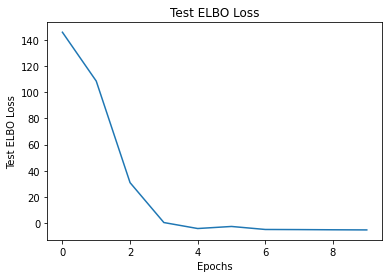

In [ ]:
%matplotlib inline
plt.plot(test_loss_list)
plt.title(f"Test ELBO Loss")
plt.ylabel('Test ELBO Loss')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/ELBO Test Loss cluster_{cluster}.pdf", dpi = 150)
plt.show()

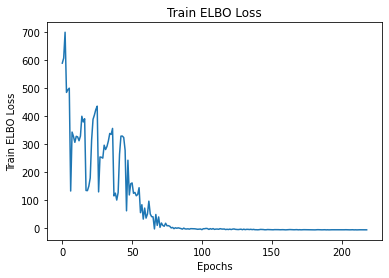

In [ ]:
plt.plot(train_loss_list)
plt.title(f"Train ELBO Loss")
plt.ylabel('Train ELBO Loss')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/ELBO Train Loss cluster_{cluster}.pdf", dpi = 150)
plt.show()

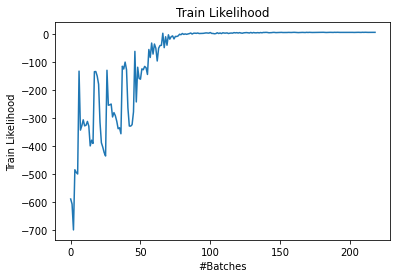

In [ ]:
plt.plot(train_likelihood_list)
plt.title(f"Train Likelihood")
plt.ylabel('Train Likelihood')
plt.xlabel('#Batches')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/Likelihood Train cluster_{cluster}.pdf", dpi = 150)
plt.show()

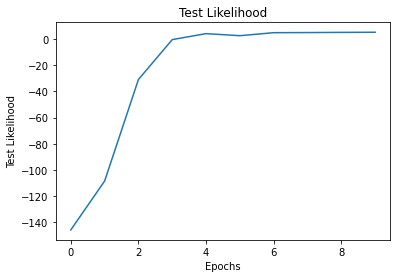

In [ ]:
plt.plot(test_likelihood_list)
plt.title(f"Test Likelihood")
plt.ylabel('Test Likelihood')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/Likelihood Test cluster_{cluster}.pdf", dpi = 150)
plt.show()

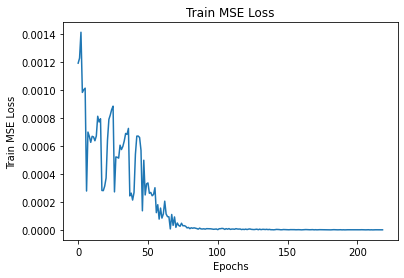

In [ ]:
plt.plot(train_mse_list)
plt.title(f"Train MSE Loss")
plt.ylabel('Train MSE Loss')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/MSE Loss Train cluster_{cluster}.pdf", dpi = 150)
plt.show()

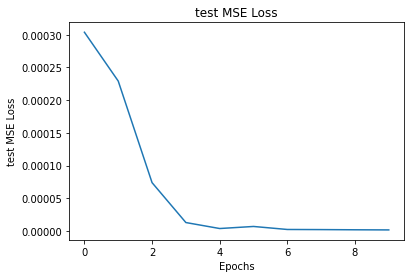

In [ ]:
plt.plot(test_mse_list)
plt.title(f"test MSE Loss")
plt.ylabel('test MSE Loss')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/MSE Loss Test cluster_{cluster}.pdf", dpi = 150)
plt.show()

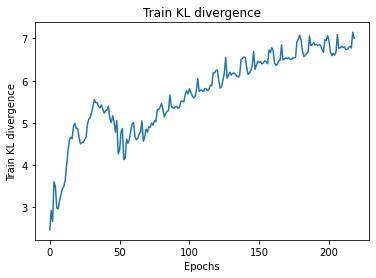

In [ ]:
plt.plot(train_kl_first_p_list)
plt.title(f"Train KL divergence")
plt.ylabel('Train KL divergence')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/KL Divergence Train cluster_{cluster}.pdf", dpi = 150)
plt.show()

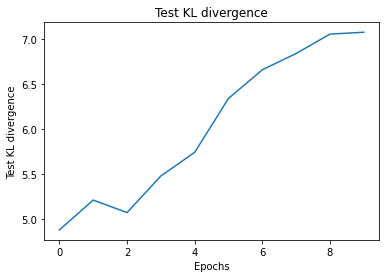

In [ ]:
plt.plot(test_kl_first_p_list)
plt.title(f"Test KL divergence")
plt.ylabel('Test KL divergence')
plt.xlabel('Epochs')
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
plt.savefig(f"plots/KL Divergence Test cluster_{cluster}.pdf", dpi = 150)
plt.show()

In [22]:
np.save(f"data_max_cluster_{cluster}.npy", data_obj['dataset_obj'].data_max.cpu().numpy())
np.save(f"data_min_cluster_{cluster}.npy", data_obj['dataset_obj'].data_min.cpu().numpy())

### Pred and True Y

In [24]:
train_pred_y = np.load(f"train pred y cluster_{cluster}.npy")
print(f"Train Predicted Y shape: {train_pred_y.shape}")
train_true_y = np.load(f"train_true_y_cluster_{cluster}.npy")
print(f"Train True Y shape: {train_true_y.shape}")
test_pred_y = np.load(f"test_pred_y_cluster_{cluster}.npy")
print(f"Test Predicted Y shape: {test_pred_y.shape}")
test_true_y = np.load(f"test_true_y_cluster_{cluster}.npy")
print(f"Test True Y shape: {test_true_y.shape}")

Train Predicted Y shape: (2000, 5, 1)
Train True Y shape: (2000, 5, 1)
Test Predicted Y shape: (9900, 5, 1)
Test True Y shape: (9900, 5, 1)


In [23]:
data_max = np.load(f"data_max_cluster_{cluster}.npy")
print(f"Data Max shape: {data_max.shape}")

data_min = np.load(f"data_min_cluster_{cluster}.npy")
print(f"Data Min shape: {data_min.shape}")


Data Max shape: (1,)
Data Min shape: (1,)


In [25]:
# multiply train_pred_y by data_max and add data_min and save it as train_pred_y 
train_pred_y = (train_pred_y * data_max) + data_min
# multiply test_pred_y by data_max and add data_min and save it as test_pred_y
test_pred_y = (test_pred_y * data_max) + data_min
# multiply train_true_y by data_max and add data_min and save it as train_true_y
train_true_y = (train_true_y * data_max) + data_min
# multiply test_true_y by data_max and add data_min and save it as test_true_y
test_true_y = (test_true_y * data_max) + data_min



In [26]:
# reshape train_pred_y to be (num_samples, num_features)
train_pred_y = train_pred_y.reshape(train_pred_y.shape[0], -1)
print(f"Train Predicted Y shape: {train_pred_y.shape}")

# reshape train_true_y to be (num_samples, num_features)
train_true_y = train_true_y.reshape(train_true_y.shape[0], -1)
print(f"Train True Y shape: {train_true_y.shape}")

# reshape test_pred_y to be (num_samples, num_features)
test_pred_y = test_pred_y.reshape(test_pred_y.shape[0], -1)
print(f"Test Predicted Y shape: {test_pred_y.shape}")

# reshape test_true_y to be (num_samples, num_features)
test_true_y = test_true_y.reshape(test_true_y.shape[0], -1)
print(f"Test True Y shape: {test_true_y.shape}")

Train Predicted Y shape: (2000, 5)
Train True Y shape: (2000, 5)
Test Predicted Y shape: (9900, 5)
Test True Y shape: (9900, 5)


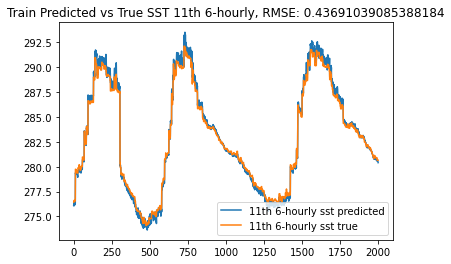

In [27]:
%matplotlib inline
# plot the first 10 samples of the train_pred_y[:, 0] and train_true_y[:, 0] with labels as the 11th 6-hourly sst true and the 11th 6-hourly sst predicted values 
# import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error
plt.plot(train_pred_y[:, 0], label = "11th 6-hourly sst predicted")
plt.plot(train_true_y[:, 0], label = "11th 6-hourly sst true")
# get rmse of the first 10 samples of the train_pred_y[:, 0] and train_true_y[:, 0]
rmse = np.sqrt(mean_squared_error(train_pred_y[:, 0], train_true_y[:, 0]))
# include rmse in the title
plt.title(f"Train Predicted vs True SST 11th 6-hourly, RMSE: {rmse}")
plt.legend()
plt.show()
# save the plot
if not os.path.exists("plots/"):
    utils.makedirs("plots/")
    plt.savefig(f"plots/Train Pred vs True SST 11th 6-hourly cluster_{cluster}.pdf", dpi = 150) 

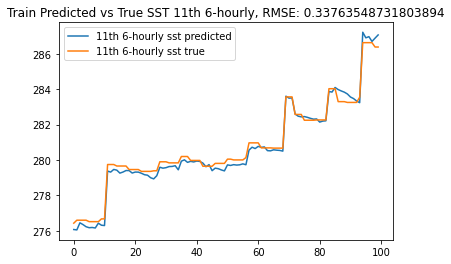

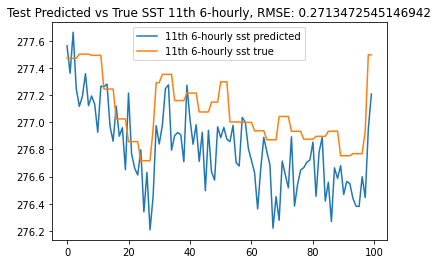

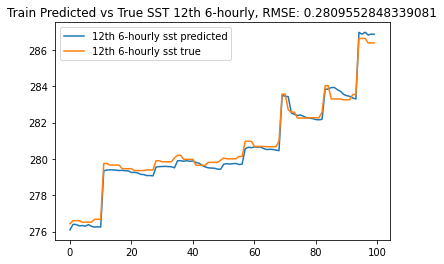

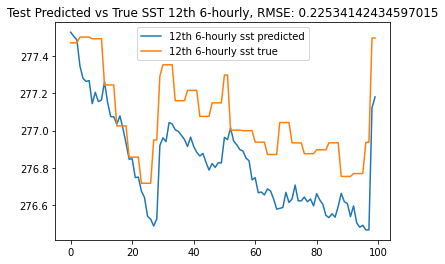

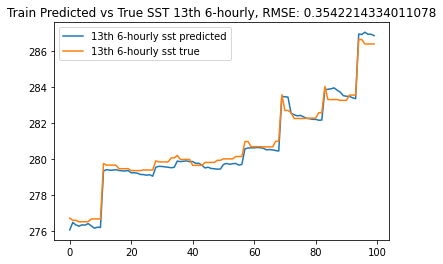

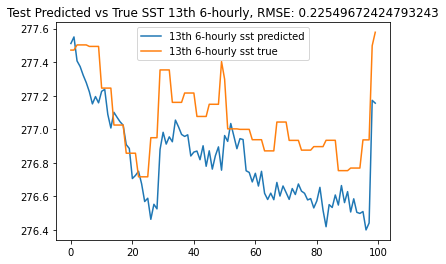

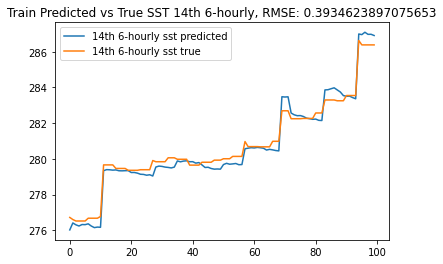

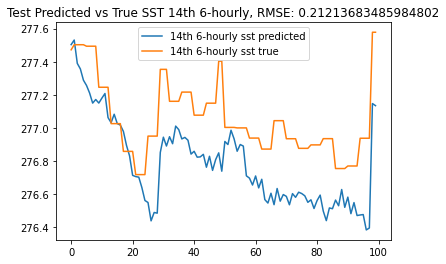

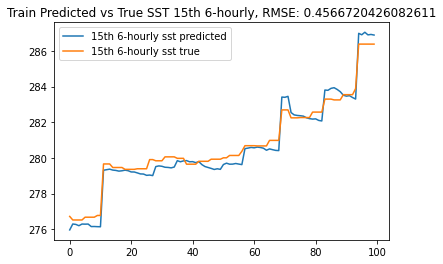

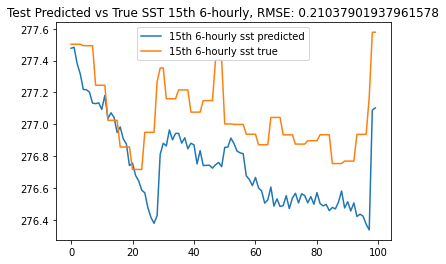

In [29]:
# plot the first 100 samples of the train_pred_y[:10, i] and train_true_y[:10, i] with labels as the (i+11)th 6-hourly sst true and the (i+11)th 6-hourly sst predicted values
# import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error
def plot_pred_true_sst(train_pred_y, train_true_y, i, title):
    %matplotlib inline
    plt.plot(train_pred_y[:100, i], label = f"{i+11}th 6-hourly sst predicted")
    plt.plot(train_true_y[:100, i], label = f"{i+11}th 6-hourly sst true")
    rmse = np.sqrt(mean_squared_error(train_pred_y[:10, i], train_true_y[:10, i]))
    plt.title(f"{title} Predicted vs True SST {i+11}th 6-hourly, RMSE: {rmse}")
    plt.legend()
    plt.show()
    if not os.path.exists("plots/"):
        utils.makedirs("plots/")
        plt.savefig(f"plots/{title} Pred vs True SST {i+11}th 6-hourly cluster_{cluster}.pdf", dpi = 150)

# i goes from 0 to 5
for i in range(5):
    plot_pred_true_sst(train_pred_y, train_true_y, i, "Train")
    # plot_pred_true_sst(test_pred_y, test_true_y, i, "Test")
    plot_pred_true_sst(test_pred_y, test_true_y, i, "Test")
